# Hackathon: Stories Coffee Profit Study

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [62]:
Monthly_Sales_Path = './REP_S_00134_SMRY.csv'
Product_Profitability_Path = './rep_s_00014_SMRY.csv'
Sales_Group_Path = './rep_s_00191_SMRY-3.csv'
Category_Path = './rep_s_00673_SMRY.csv'

## 1. Data Cleaning

The issue with most of the tables is that there are no clear column labels, many irrelevant metadata or empty cells, and some of the rows have continuations that appear in different rows. Thus, it is important that we clean the given data to get something more structured which the ML implementation can work with.

### a. Monthly Sales (REP_S_00134_SMRY)

In [63]:
df = pd.read_csv(Monthly_Sales_Path, header=None)
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Comparative Monthly Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22-Jan-2026,NaN,"Year: 2026,2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Page 1 of,0.01
3,NaN,NaN,NaN,January,February,March,April,May,June,July,August,September,NaN,NaN
4,2025,Stories - Bir Hasan,NaN,"3,355,705.33","2,842,993.67","2,266,050.67","3,459,979.67","2,125,379.33","744,638.33","3,799,740.25","3,783,897.91","3,255,935.75",NaN,NaN
5,NaN,Stories Ain El Mreisseh,NaN,"12,648,546.67","9,929,973.33","9,849,926.67","13,025,923.33","7,208,975.00","2,883,403.33","11,889,329.16","11,610,097.92","11,021,123.75",NaN,NaN
6,NaN,Stories Airport,NaN,0.00,0.00,0.00,0.00,0.00,"8,428.83","2,940,003.01","6,963,426.45","7,467,197.62",NaN,NaN
7,NaN,Stories Antelias,NaN,"2,615,854.33","2,139,010.67","3,162,716.67","3,391,741.33","2,033,635.67","728,978.33","2,963,696.71","3,182,363.97","2,909,965.47",NaN,NaN
8,NaN,Stories Batroun,NaN,"4,266,517.33","3,388,117.33","4,890,198.33","5,516,881.67","2,963,980.33","1,311,240.00","6,135,003.02","6,751,770.29","5,041,150.76",NaN,NaN
9,NaN,Stories Bayada,NaN,"4,497,376.67","3,419,106.67","5,083,386.67","5,196,906.67","3,043,400.00","1,208,190.00","5,448,609.92","5,613,038.75","4,917,258.26",NaN,NaN


In [64]:
df.shape

(112, 14)

In [65]:
df = pd.read_csv(Monthly_Sales_Path, header=None)

# Find and use the actual header row (row 3 contains the month names) 
actual_headers = df.iloc[3].tolist()
df.columns = actual_headers

# Start from row 4 (after headers and metadata)
df = df.iloc[4:].reset_index(drop=True)

df.head()

,NaN,NaN,NaN,January,February,March,April,May,June,July,August,September,NaN,NaN
0,2025,Stories - Bir Hasan,NaN,"3,355,705.33","2,842,993.67","2,266,050.67","3,459,979.67","2,125,379.33","744,638.33","3,799,740.25","3,783,897.91","3,255,935.75",NaN,NaN
1,NaN,Stories Ain El Mreisseh,NaN,"12,648,546.67","9,929,973.33","9,849,926.67","13,025,923.33","7,208,975.00","2,883,403.33","11,889,329.16","11,610,097.92","11,021,123.75",NaN,NaN
2,NaN,Stories Airport,NaN,0.00,0.00,0.00,0.00,0.00,"8,428.83","2,940,003.01","6,963,426.45","7,467,197.62",NaN,NaN
3,NaN,Stories Antelias,NaN,"2,615,854.33","2,139,010.67","3,162,716.67","3,391,741.33","2,033,635.67","728,978.33","2,963,696.71","3,182,363.97","2,909,965.47",NaN,NaN
4,NaN,Stories Batroun,NaN,"4,266,517.33","3,388,117.33","4,890,198.33","5,516,881.67","2,963,980.33","1,311,240.00","6,135,003.02","6,751,770.29","5,041,150.76",NaN,NaN


In [66]:
def to_num(val):
    try:
        return float(str(val).replace(',', '').strip())
    except:
        return np.nan

raw = pd.read_csv(Monthly_Sales_Path, header=None, dtype=str)

JAN_SEP = ['January','February','March','April','May','June','July','August','September']
OCT_DEC = ['October','November','December','Total']

records_jan_sep = []
records_oct_dec = []

current_section = None   # 'jan_sep' | 'oct_dec'
jan_start_col   = 3      # Jan is at col 3 initially, shifts to col 2 after page-break headers
current_year    = None

for _, row in raw.iterrows():
    r = [str(v).strip() if pd.notna(v) else '' for v in row]

    # Detect header / page-break rows 
    # Initial Jan-Sep header:  col[3] == 'January'
    if r[3] == 'January' and r[4] == 'February':
        current_section = 'jan_sep'
        jan_start_col   = 3
        continue
    # Page-break Jan-Sep header: col[2] == 'January'
    if r[2] == 'January' and r[3] == 'February':
        current_section = 'jan_sep'
        jan_start_col   = 2
        continue
    # Oct-Dec header: col[2] == 'October'
    if r[2] == 'October' and r[3] == 'November':
        current_section = 'oct_dec'
        continue
    # Skip pure metadata / empty header rows
    if current_section is None:
        continue

    # Forward-fill year 
    if r[0] not in ('', 'nan'):
        try:
            current_year = int(float(r[0]))
        except:
            pass

    # Get branch 
    branch = r[1] if r[1] not in ('', 'nan') else None
    if not branch or 'Total' in branch:
        continue

    # Parse monthly values 
    if current_section == 'jan_sep':
        rec = {'Year': current_year, 'Branch': branch}
        for i, m in enumerate(JAN_SEP):
            rec[m] = to_num(row.iloc[jan_start_col + i])
        records_jan_sep.append(rec)

    elif current_section == 'oct_dec':
        rec = {'Year': current_year, 'Branch': branch}
        for i, m in enumerate(OCT_DEC):
            rec[m] = to_num(row.iloc[2 + i])
        records_oct_dec.append(rec)

df_jan_sep = pd.DataFrame(records_jan_sep)
df_oct_dec = pd.DataFrame(records_oct_dec)

print(f"Jan-Sep records: {len(df_jan_sep)}  |  Oct-Dec records: {len(df_oct_dec)}")
print(f"Branches (Jan-Sep): {sorted(df_jan_sep['Branch'].unique())}")


Jan-Sep records: 48  |  Oct-Dec records: 48
Branches (Jan-Sep): ['Stories - Bir Hasan', 'Stories Ain El Mreisseh', 'Stories Airport', 'Stories Antelias', 'Stories Batroun', 'Stories Bayada', 'Stories Centro Mall', 'Stories Event Starco', 'Stories Faqra', 'Stories Khaldeh', 'Stories LAU', 'Stories Le Mall', 'Stories Mansourieh', 'Stories Ramlet El Bayda', 'Stories Saida', 'Stories Sour 2', 'Stories Verdun', 'Stories Zalka', 'Stories alay', 'Stories amioun', 'Stories jbeil', 'Stories kaslik', 'Stories raouche', 'Stories sin el fil', 'Stories.']


In [67]:
# Merge Jan-Sep and Oct-Dec on Branch + Year
df_sales = df_jan_sep.merge(df_oct_dec, on=['Branch', 'Year'], how='outer')

# Enforce column order: Branch | Year | Jan … Dec | Total
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December','Total']
df_sales = df_sales[['Branch', 'Year'] + month_order]

# Sort by Year then Branch
df_sales = df_sales.sort_values(['Year', 'Branch']).reset_index(drop=True)

print(f"Final shape: {df_sales.shape}")
print(f"Years: {sorted(df_sales['Year'].unique())}")
print(f"Branches ({df_sales['Branch'].nunique()}): {sorted(df_sales['Branch'].unique())}")
df_sales.head()

Final shape: (48, 15)
Years: [np.int64(2025), np.int64(2026)]
Branches (25): ['Stories - Bir Hasan', 'Stories Ain El Mreisseh', 'Stories Airport', 'Stories Antelias', 'Stories Batroun', 'Stories Bayada', 'Stories Centro Mall', 'Stories Event Starco', 'Stories Faqra', 'Stories Khaldeh', 'Stories LAU', 'Stories Le Mall', 'Stories Mansourieh', 'Stories Ramlet El Bayda', 'Stories Saida', 'Stories Sour 2', 'Stories Verdun', 'Stories Zalka', 'Stories alay', 'Stories amioun', 'Stories jbeil', 'Stories kaslik', 'Stories raouche', 'Stories sin el fil', 'Stories.']


,Branch,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,Stories - Bir Hasan,2025,3355705.33,2842993.67,2266050.67,3459979.67,2125379.33,744638.33,3799740.25,3783897.91,3255935.75,3128528.54,2851287.10,2743087.70,3.435722e+07
1,Stories Ain El Mreisseh,2025,12648546.67,9929973.33,9849926.67,13025923.33,7208975.00,2883403.33,11889329.16,11610097.92,11021123.75,10516783.81,9387782.61,9640996.43,1.196129e+08
2,Stories Airport,2025,0.00,0.00,0.00,0.00,0.00,8428.83,2940003.01,6963426.45,7467197.62,8414672.70,7029720.14,6604828.86,3.942828e+07
3,Stories Antelias,2025,2615854.33,2139010.67,3162716.67,3391741.33,2033635.67,728978.33,2963696.71,3182363.97,2909965.47,2715152.86,2551353.16,2234759.77,3.062923e+07
4,Stories Batroun,2025,4266517.33,3388117.33,4890198.33,5516881.67,2963980.33,1311240.00,6135003.02,6751770.29,5041150.76,4372225.54,4272667.88,5163712.03,5.407346e+07


In [68]:
df_sales.tail()

,Branch,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total
43,Stories amioun,2026,1993321.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993321.33
44,Stories jbeil,2026,4189610.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4189610.42
45,Stories kaslik,2026,1034753.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1034753.16
46,Stories raouche,2026,1896890.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1896890.40
47,Stories sin el fil,2026,2455657.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2455657.06


In [69]:
# Quick sanity-check: compare 'Total' column vs sum of months
df_sales['Computed_Total'] = df_sales[['January','February','March','April','May','June',
                                      'July','August','September','October','November','December']].sum(axis=1)
df_sales['Total_Match'] = (df_sales['Total'] - df_sales['Computed_Total']).abs() < 1  # within $1 rounding

print("Rows where computed total matches reported Total:")
print(df_sales['Total_Match'].value_counts())

# Drop helper columns — keep df_sales clean
df_sales.drop(columns=['Computed_Total', 'Total_Match'], inplace=True)
df_sales.head()


Rows where computed total matches reported Total:
Total_Match
True    48
Name: count, dtype: int64


,Branch,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,Stories - Bir Hasan,2025,3355705.33,2842993.67,2266050.67,3459979.67,2125379.33,744638.33,3799740.25,3783897.91,3255935.75,3128528.54,2851287.10,2743087.70,3.435722e+07
1,Stories Ain El Mreisseh,2025,12648546.67,9929973.33,9849926.67,13025923.33,7208975.00,2883403.33,11889329.16,11610097.92,11021123.75,10516783.81,9387782.61,9640996.43,1.196129e+08
2,Stories Airport,2025,0.00,0.00,0.00,0.00,0.00,8428.83,2940003.01,6963426.45,7467197.62,8414672.70,7029720.14,6604828.86,3.942828e+07
3,Stories Antelias,2025,2615854.33,2139010.67,3162716.67,3391741.33,2033635.67,728978.33,2963696.71,3182363.97,2909965.47,2715152.86,2551353.16,2234759.77,3.062923e+07
4,Stories Batroun,2025,4266517.33,3388117.33,4890198.33,5516881.67,2963980.33,1311240.00,6135003.02,6751770.29,5041150.76,4372225.54,4272667.88,5163712.03,5.407346e+07


### b. Product Profitability (rep_s_00014_SMRY)

In [70]:
# Columns in data rows: Product Desc | Qty | Total Price | (empty) | Total Cost | Total Cost % | Total Profit | (empty) | Total Profit %

raw_pp = pd.read_csv(Product_Profitability_Path, header=None, dtype=str)

SKIP_PREFIXES = (
    'Theoretical', 'Stories,',   # title / company rows
    '22-Jan', '22-jan',           # page-date header
    'Product Desc',               # column header row
    'Total By',                   # subtotal rows
)

records_pp = []
current_branch = None

for _, row in raw_pp.iterrows():
    r = [str(v).strip() if pd.notna(v) and str(v).strip() not in ('nan','') else '' for v in row]
    col0 = r[0]

    # Branch header: col0 starts with "Stories", rest of row is empty 
    if col0.startswith('Stories') and all(v == '' for v in r[1:]):
        current_branch = col0
        continue

    # Rows to skip 
    if any(col0.startswith(p) for p in SKIP_PREFIXES):
        continue

    # Skip rows that have no branch yet 
    if current_branch is None:
        continue

    # Category / section label rows: col0 non-empty but col1 (Qty) empty 
    qty_raw = r[1] if len(r) > 1 else ''
    if qty_raw == '':
        continue   # section label, no numeric data

    # Data row 
    def n(v):
        try: return float(v.replace(',', ''))
        except: return np.nan

    records_pp.append({
        'Branch':          current_branch,
        'Product':         col0,
        'Qty':             n(r[1]),
        'Total_Price':     n(r[2]),
        'Total_Cost':      n(r[4]) if len(r) > 4 else np.nan,
        'Total_Cost_Pct':  n(r[5]) if len(r) > 5 else np.nan,
        'Total_Profit':    n(r[6]) if len(r) > 6 else np.nan,
        'Total_Profit_Pct':n(r[8]) if len(r) > 8 else np.nan,
    })

df_product = pd.DataFrame(records_pp)

# Clean up: drop rows where all numeric columns are NaN (shouldn't happen, but safety net)
num_cols = ['Qty','Total_Price','Total_Cost','Total_Cost_Pct','Total_Profit','Total_Profit_Pct']
df_product = df_product.dropna(subset=num_cols, how='all').reset_index(drop=True)

print(f"Shape: {df_product.shape}")
print(f"Branches ({df_product['Branch'].nunique()}): {sorted(df_product['Branch'].unique())}")
print(f"Unique products: {df_product['Product'].nunique()}")
df_product.head(10)


Shape: (12522, 8)
Branches (25): ['Stories - Bir Hasan', 'Stories Ain El Mreisseh', 'Stories Airport', 'Stories Antelias', 'Stories Batroun', 'Stories Bayada', 'Stories Centro Mall', 'Stories Event Starco', 'Stories Faqra', 'Stories Khaldeh', 'Stories LAU', 'Stories Le Mall', 'Stories Mansourieh', 'Stories Ramlet El Bayda', 'Stories Saida', 'Stories Sour 2', 'Stories Verdun', 'Stories Zalka', 'Stories alay', 'Stories amioun', 'Stories jbeil', 'Stories kaslik', 'Stories raouche', 'Stories sin el fil', 'Stories.']
Unique products: 551


,Branch,Product,Qty,Total_Price,Total_Cost,Total_Cost_Pct,Total_Profit,Total_Profit_Pct
0,Stories - Bir Hasan,1 SHOT DECAFE,404.0,0.00,3856.85,0.00,-3856.85,100.00
1,Stories - Bir Hasan,2 SHOT DECAFE,637.0,0.00,12162.45,0.00,-12162.45,100.00
2,Stories - Bir Hasan,3 SHOT DECAFE,113.0,0.00,3236.32,0.00,-3236.32,100.00
3,Stories - Bir Hasan,ADD BANANA SAUCE LARGE,4.0,266.67,139.97,52.49,126.69,47.51
4,Stories - Bir Hasan,ADD BANANA SAUCE MEDIUM,47.0,1487.39,822.34,55.29,665.04,44.71
5,Stories - Bir Hasan,ADD BANANA SAUCE SMALL,28.0,893.72,489.91,54.82,403.82,45.18
6,Stories - Bir Hasan,ADD CARAMEL DRIZZLE,700.0,23370.36,2349.38,10.05,21020.99,89.95
7,Stories - Bir Hasan,ADD CARAMEL LARGE,313.0,10488.50,2690.19,25.65,7798.31,74.35
8,Stories - Bir Hasan,ADD CARAMEL MEDIUM,1142.0,37584.33,8923.01,23.74,28661.32,76.26
9,Stories - Bir Hasan,ADD CARAMEL SF LARGE,236.0,7889.52,3097.89,39.27,4791.63,60.73


### c. Sales by Items By Group (rep_s_00191_SMRY-3)

In [71]:
# Columns: Description | Barcode (usually empty) | Qty | Total Amount

# Structure per branch:
#   "Branch: Stories X"  > branch header
#   "Division: ..."      > division label
#   "Group: ..."         > group label
#   item rows            > data (col0=name, col2=qty, col3=amount)
#   "Total by ..."       > subtotals (skip)
#   page-break / col-header rows (skip)

raw_sg = pd.read_csv(Sales_Group_Path, header=None, dtype=str)

records_sg = []
current_branch_sg   = None
current_division_sg = None
current_group_sg    = None

def n2(v):
    try: return float(str(v).replace(',', '').strip())
    except: return np.nan

def clean(v):
    return str(v).strip() if pd.notna(v) and str(v).strip() not in ('nan', '') else ''

for _, row in raw_sg.iterrows():
    r = [clean(v) for v in row]
    col0 = r[0]

    # Page-break / metadata rows to skip
    if col0 == '' or col0 in ('Stories', 'Sales by Items By Group', 'Description'):
        continue
    if col0[:2].isdigit() and '-Jan-' in col0:   # date header e.g. "19-Jan-26"
        continue
    if col0.startswith('Total by'):
        continue

    # Branch header 
    if col0.startswith('Branch:'):
        current_branch_sg   = col0.replace('Branch:', '').strip()
        current_division_sg = None
        current_group_sg    = None
        continue

    # Division label 
    if col0.startswith('Division:'):
        current_division_sg = col0.replace('Division:', '').strip()
        current_group_sg    = None
        continue

    # Group label
    if col0.startswith('Group:'):
        current_group_sg = col0.replace('Group:', '').strip()
        continue

    # Skip rows before the first branch
    if current_branch_sg is None:
        continue

    # Data row: col2 (Qty) must be numeric
    qty_val = n2(r[2]) if len(r) > 2 else np.nan
    if np.isnan(qty_val):
        continue

    records_sg.append({
        'Branch':    current_branch_sg,
        'Division':  current_division_sg,
        'Group':     current_group_sg,
        'Item':      col0,
        'Qty':       qty_val,
        'Total_Amount': n2(r[3]) if len(r) > 3 else np.nan,
    })

df_sales_group = pd.DataFrame(records_sg)
df_sales_group = df_sales_group.dropna(subset=['Qty', 'Total_Amount'], how='all').reset_index(drop=True)

print(f"Shape: {df_sales_group.shape}")
print(f"Branches  ({df_sales_group['Branch'].nunique()}): {sorted(df_sales_group['Branch'].unique())}")
print(f"Divisions ({df_sales_group['Division'].nunique()}): {sorted(df_sales_group['Division'].unique())}")
print(f"Groups    ({df_sales_group['Group'].nunique()}): {sorted(df_sales_group['Group'].unique())[:10]} ...")
df_sales_group.head(10)


Shape: (11113, 6)
Branches  (25): ['Stories - Bir Hasan', 'Stories Ain El Mreisseh', 'Stories Airport', 'Stories Antelias', 'Stories Batroun', 'Stories Bayada', 'Stories Centro Mall', 'Stories Event Starco', 'Stories Faqra', 'Stories Khaldeh', 'Stories LAU', 'Stories Le Mall', 'Stories Mansourieh', 'Stories Ramlet El Bayda', 'Stories Saida', 'Stories Sour 2', 'Stories Verdun', 'Stories Zalka', 'Stories alay', 'Stories amioun', 'Stories jbeil', 'Stories kaslik', 'Stories raouche', 'Stories sin el fil', 'Stories.']
Divisions (22): ['CARTON', 'CINNAMON ROLLS', 'COFFEE PASTRY', 'COLD BAR SECTION', 'COOKIES', 'CROISSANT', 'DONUTS', 'FRENCH PASTRY', 'FROZEN YOGHURT', 'GRAB&GO BEVERAGES', 'GRAB&GO FOOD', 'HEALTHY SECTION', 'HOT BAR SECTION', 'NOT USED', 'OFFER', 'PIZZA', 'PLAT DE JOUR', 'POP UP BEVERAGE', 'SALADS BAR', 'SANDWICHES', 'SUBS', 'WRAP']
Groups    (36): ['ADD ONS', 'ADD SYRUP', 'BEANS', 'BLACK COFFEE', 'BLENDED BRINKS', 'CINNAMONS', 'COFFEE PASTRY', 'COMBO TOPPINGS', 'COOKIES', 'CR

,Branch,Division,Group,Item,Qty,Total_Amount
0,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,ESPRESSO,3313.0,500103.75
1,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,DOUBLE ESPRESSO,3200.0,498631.33
2,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,AMERICANO SMALL,902.0,176816.53
3,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,AMERICANO MEDIUM,657.0,152807.36
4,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,AMERICANO LARGE,334.0,88443.43
5,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,BLACK COFFEE SMALL,823.0,133384.23
6,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,BLACK COFFEE MEDIUM,307.0,62723.78
7,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,BLACK COFFEE LARGE,86.0,19908.92
8,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,SINGLE ESPRESSO MACC,32.0,5156.93
9,Stories - Bir Hasan,HOT BAR SECTION,BLACK COFFEE,DOUBLE ESPRESSO MAC,35.0,6595.68


### d. Profit By Category (rep_s_00673_SMRY)

In [72]:
# Columns: Category | Qty | Total Price | (empty) | Total Cost | Total Cost % | Total Profit | (empty) | Total Profit %

raw_cat = pd.read_csv(Category_Path, header=None, dtype=str)

records_cat = []
current_branch_cat = None

def nc(v):
    try: return float(str(v).replace(',', '').strip())
    except: return np.nan

def clc(v):
    return str(v).strip() if pd.notna(v) and str(v).strip() not in ('nan', '') else ''

for _, row in raw_cat.iterrows():
    r = [clc(v) for v in row]
    col0 = r[0]

    # Skip blank / metadata / page-break rows 
    if col0 == '':
        continue
    if col0 in ('Stories', 'Theoretical Profit By Category', 'Category'):
        continue
    if col0[:2].isdigit() and '-Jan-' in col0:   # date header e.g. "22-Jan-26"
        continue
    if col0.startswith('Total By'):
        continue

    # Branch header: starts with "Stories", rest of row empty 
    if col0.startswith('Stories') and all(v == '' for v in r[1:]):
        current_branch_cat = col0
        continue

    # Skip rows before first branch 
    if current_branch_cat is None:
        continue

    # Data row: col1 (Qty) must be numeric
    qty_val = nc(r[1]) if len(r) > 1 else np.nan
    if np.isnan(qty_val):
        continue

    records_cat.append({
        'Branch':           current_branch_cat,
        'Category':         col0,
        'Qty':              qty_val,
        'Total_Price':      nc(r[2]) if len(r) > 2 else np.nan,
        'Total_Cost':       nc(r[4]) if len(r) > 4 else np.nan,
        'Total_Cost_Pct':   nc(r[5]) if len(r) > 5 else np.nan,
        'Total_Profit':     nc(r[6]) if len(r) > 6 else np.nan,
        'Total_Profit_Pct': nc(r[8]) if len(r) > 8 else np.nan,
    })

df_category = pd.DataFrame(records_cat).dropna(subset=['Qty', 'Total_Cost'], how='all').reset_index(drop=True)

print(f"Shape: {df_category.shape}")
print(f"Branches   ({df_category['Branch'].nunique()}): {sorted(df_category['Branch'].unique())}")
print(f"Categories ({df_category['Category'].nunique()}): {sorted(df_category['Category'].unique())}")
df_category.head()


Shape: (50, 8)
Branches   (25): ['Stories - Bir Hasan', 'Stories Ain El Mreisseh', 'Stories Airport', 'Stories Antelias', 'Stories Batroun', 'Stories Bayada', 'Stories Centro Mall', 'Stories Event Starco', 'Stories Faqra', 'Stories Khaldeh', 'Stories LAU', 'Stories Le Mall', 'Stories Mansourieh', 'Stories Ramlet El Bayda', 'Stories Saida', 'Stories Sour 2', 'Stories Verdun', 'Stories Zalka', 'Stories alay', 'Stories amioun', 'Stories jbeil', 'Stories kaslik', 'Stories raouche', 'Stories sin el fil', 'Stories.']
Categories (2): ['BEVERAGES', 'FOOD']


,Branch,Category,Qty,Total_Price,Total_Cost,Total_Cost_Pct,Total_Profit,Total_Profit_Pct
0,Stories - Bir Hasan,BEVERAGES,137572.1,1841385.84,4143855.17,22.50,14270003.22,77.50
1,Stories - Bir Hasan,FOOD,102791.4,1264966.00,4658225.80,36.82,7991434.23,63.18
2,Stories Centro Mall,BEVERAGES,138680.5,2054988.70,4591734.79,22.34,15958152.17,77.66
3,Stories Centro Mall,FOOD,121423.1,1307149.74,4981860.70,38.11,8089636.74,61.89
4,Stories LAU,BEVERAGES,58430.0,777228.30,1774898.67,22.84,5997384.33,77.16


We now obtain the following cleaned dataframes:
* **df_sales** has the monthly sales for 2025 + 2026 for each branch
* **df_product** has price, cost, profit info by product and branch
* **df_sales_group** has the quantity and total amount sold by item, group, and branch
* **df_category** has the price, cost, profit info by category for each branch

## 2. Data Visualization

We will move on to visualize our data to understand trends that may appear and help us with our analysis

### a. Monthly Sales (df_sales)

In [73]:
sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams.update({'figure.dpi': 110, 'axes.titlesize': 13, 'axes.labelsize': 11})

MONTHS = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']


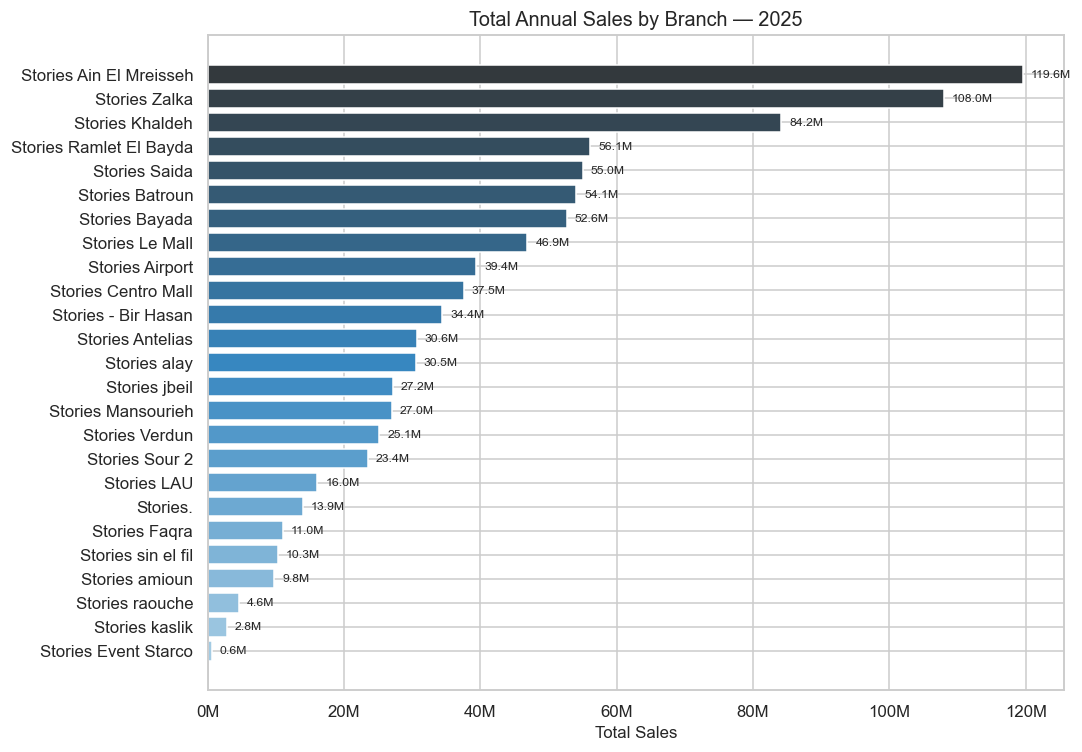

In [74]:

# Total Annual Sales per Branch (2025) 
sales_2025 = df_sales[df_sales['Year'] == 2025].copy()
branch_totals = sales_2025.set_index('Branch')['Total'].sort_values()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(branch_totals.index, branch_totals.values, color=sns.color_palette('Blues_d', len(branch_totals)))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
ax.set_xlabel('Total Sales')
ax.set_title('Total Annual Sales by Branch — 2025')
for bar, val in zip(bars, branch_totals.values):
    ax.text(val + branch_totals.max() * 0.01, bar.get_y() + bar.get_height()/2,
            f'{val/1e6:.1f}M', va='center', fontsize=8)
plt.tight_layout()
plt.show()


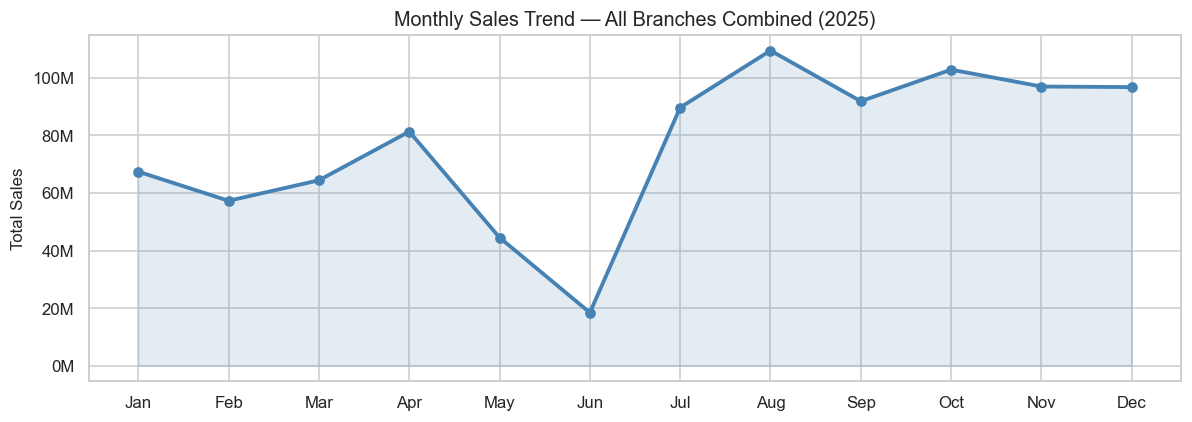

In [75]:
# Monthly Sales Trend — Total across all branches (2025) 
monthly_totals_2025 = sales_2025[MONTHS].sum()

fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(MONTHS, monthly_totals_2025.values, marker='o', linewidth=2.5, color='steelblue')
ax.fill_between(range(len(MONTHS)), monthly_totals_2025.values, alpha=0.15, color='steelblue')
ax.set_xticks(range(len(MONTHS)))
ax.set_xticklabels([m[:3] for m in MONTHS])
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
ax.set_ylabel('Total Sales')
ax.set_title('Monthly Sales Trend — All Branches Combined (2025)')
plt.tight_layout()
plt.show()


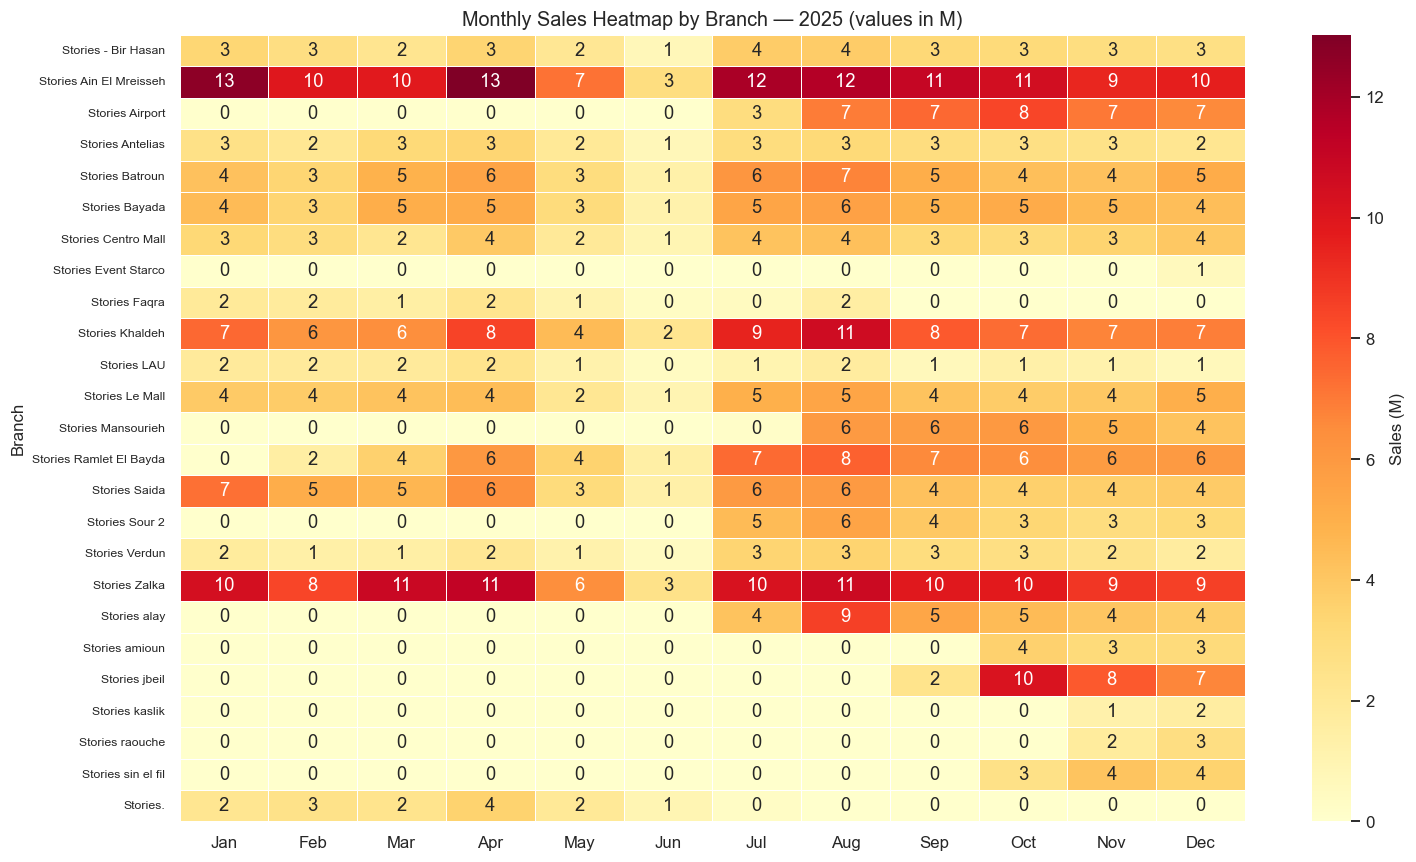

In [76]:
# Heatmap: Monthly Sales per Branch (2025)
heat_data = sales_2025.set_index('Branch')[MONTHS]

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(heat_data / 1e6, annot=True, fmt='.0f', cmap='YlOrRd',
            linewidths=0.4, ax=ax, cbar_kws={'label': 'Sales (M)'})
ax.set_title('Monthly Sales Heatmap by Branch — 2025 (values in M)')
ax.set_xlabel('')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)
ax.set_xticklabels([m[:3] for m in MONTHS], rotation=0)
plt.tight_layout()
plt.show()


### b. Product Profitability (df_product)

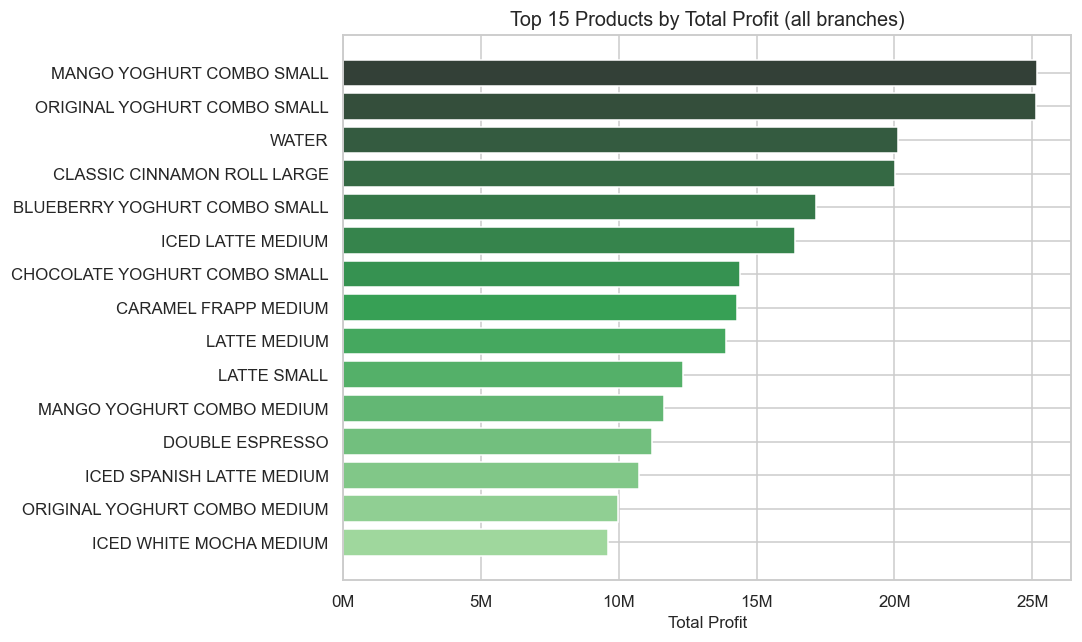

In [77]:
# Top 15 Products by Total Profit 
top_products = (df_product.groupby('Product')['Total_Profit']
                .sum().sort_values(ascending=False).head(15))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_products.index[::-1], top_products.values[::-1],
               color=sns.color_palette('Greens_d', 15))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
ax.set_xlabel('Total Profit')
ax.set_title('Top 15 Products by Total Profit (all branches)')
plt.tight_layout()
plt.show()


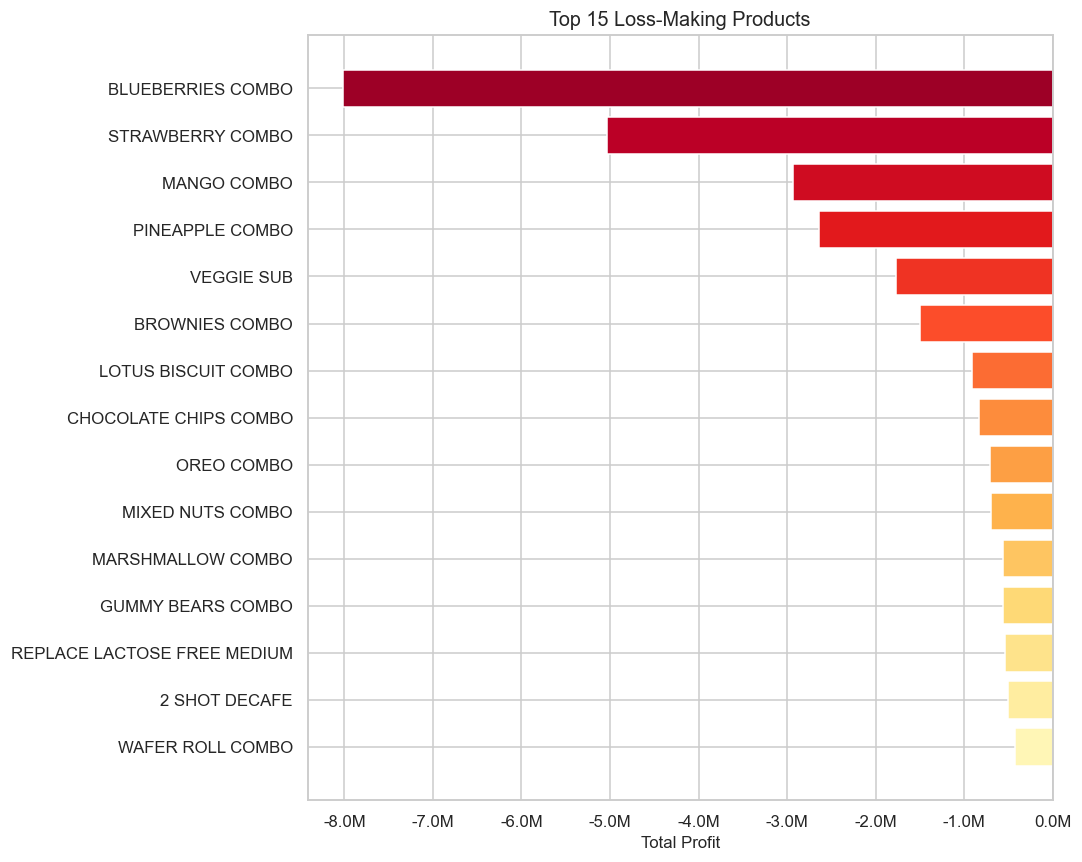

In [78]:
#  Filter products losing money
loss_products = df_product[df_product['Total_Profit'] < 0]

# Aggregate by product (sum across branches), sort by largest loss
loss_by_product = (
    loss_products.groupby('Product')['Total_Profit']
    .sum()
    .sort_values()  # most negative first
    .head(15)
)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(loss_by_product.index[::-1], loss_by_product.values[::-1], color=sns.color_palette('YlOrRd', 15))

ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
ax.set_xlabel('Total Profit')
ax.set_title('Top 15 Loss-Making Products')
ax.axvline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

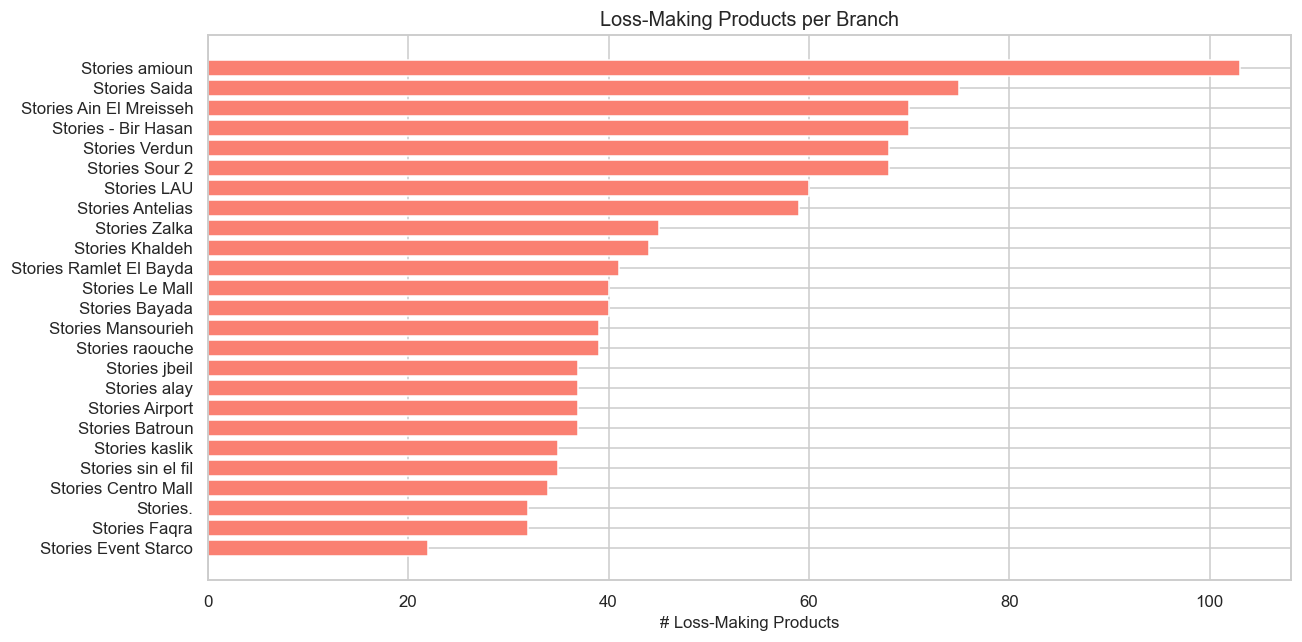

In [79]:
# Products losing money (negative profit)

plt.figure(figsize=(12,6))

negative = (
    df_product[df_product['Total_Profit'] < 0]
    .groupby('Branch')['Product']
    .count()
    .sort_values()
)

plt.barh(negative.index, negative.values, color='salmon')

plt.xlabel('# Loss-Making Products')
plt.title('Loss-Making Products per Branch')

plt.tight_layout()
plt.show()

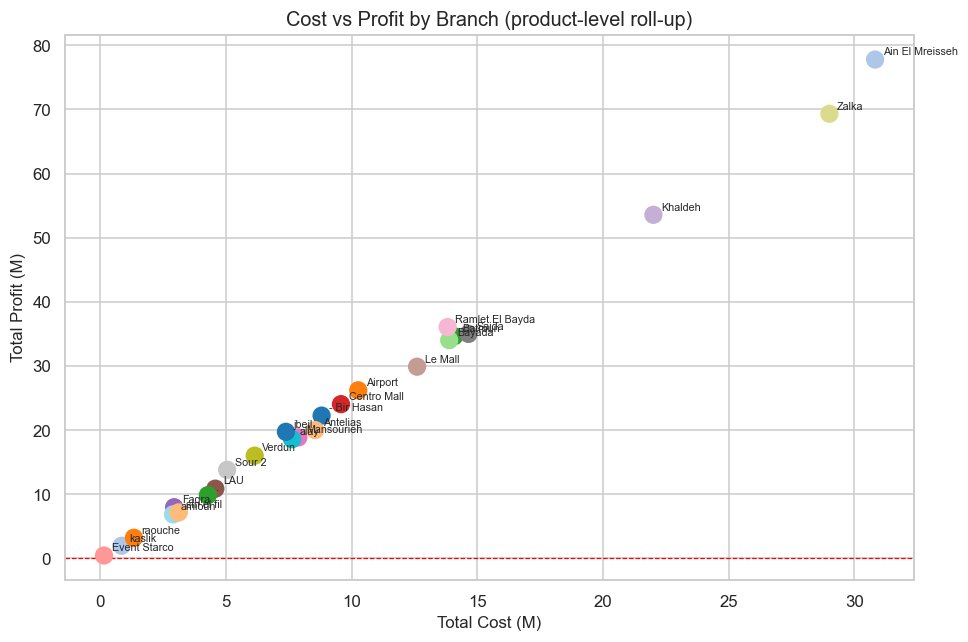

In [80]:
# Total Cost vs Total Profit per Branch (scatter) 
branch_pnl = df_product.groupby('Branch')[['Total_Cost','Total_Profit']].sum().reset_index()

fig, ax = plt.subplots(figsize=(9, 6))
scatter = ax.scatter(branch_pnl['Total_Cost']/1e6, branch_pnl['Total_Profit']/1e6,
                     s=120, zorder=3, color=sns.color_palette('tab20', len(branch_pnl)))
for _, row in branch_pnl.iterrows():
    ax.annotate(row['Branch'].replace('Stories ', '').replace('Stories', ''),
                (row['Total_Cost']/1e6, row['Total_Profit']/1e6),
                textcoords='offset points', xytext=(5, 3), fontsize=7)
ax.axhline(0, color='red', linewidth=0.8, linestyle='--')
ax.set_xlabel('Total Cost (M)')
ax.set_ylabel('Total Profit (M)')
ax.set_title('Cost vs Profit by Branch (product-level roll-up)')
plt.tight_layout()
plt.show()


### c. Sales by Group (df_sales_group)

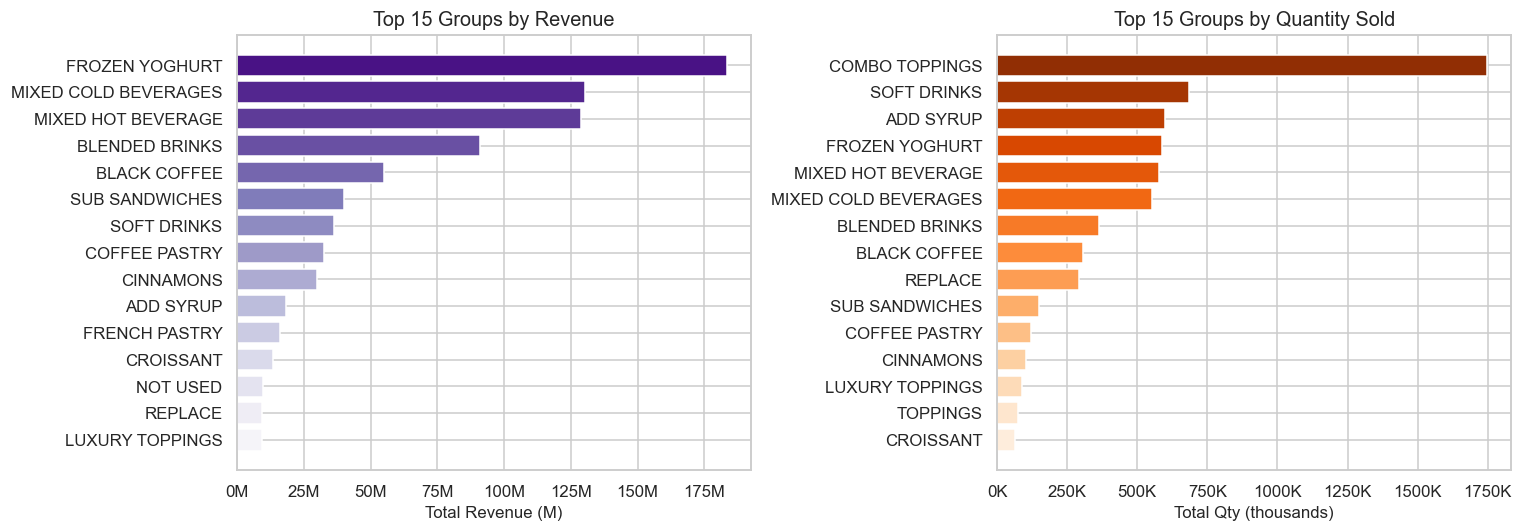

In [81]:

# Top 15 Groups by Total Revenue 
top_groups = (df_sales_group.groupby('Group')['Total_Amount']
              .sum().sort_values(ascending=False).head(15))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

top_groups_plot = top_groups.sort_values()
axes[0].barh(top_groups_plot.index, top_groups_plot.values / 1e6,
             color=sns.color_palette('Purples', len(top_groups_plot)))
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}M'))
axes[0].set_xlabel('Total Revenue (M)')
axes[0].set_title('Top 15 Groups by Revenue')

# Top 15 Groups by Quantity 
top_qty = (df_sales_group.groupby('Group')['Qty']
           .sum().sort_values(ascending=False).head(15).sort_values())
axes[1].barh(top_qty.index, top_qty.values / 1e3,
             color=sns.color_palette('Oranges', len(top_qty)))
axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}K'))
axes[1].set_xlabel('Total Qty (thousands)')
axes[1].set_title('Top 15 Groups by Quantity Sold')

plt.tight_layout()
plt.show()


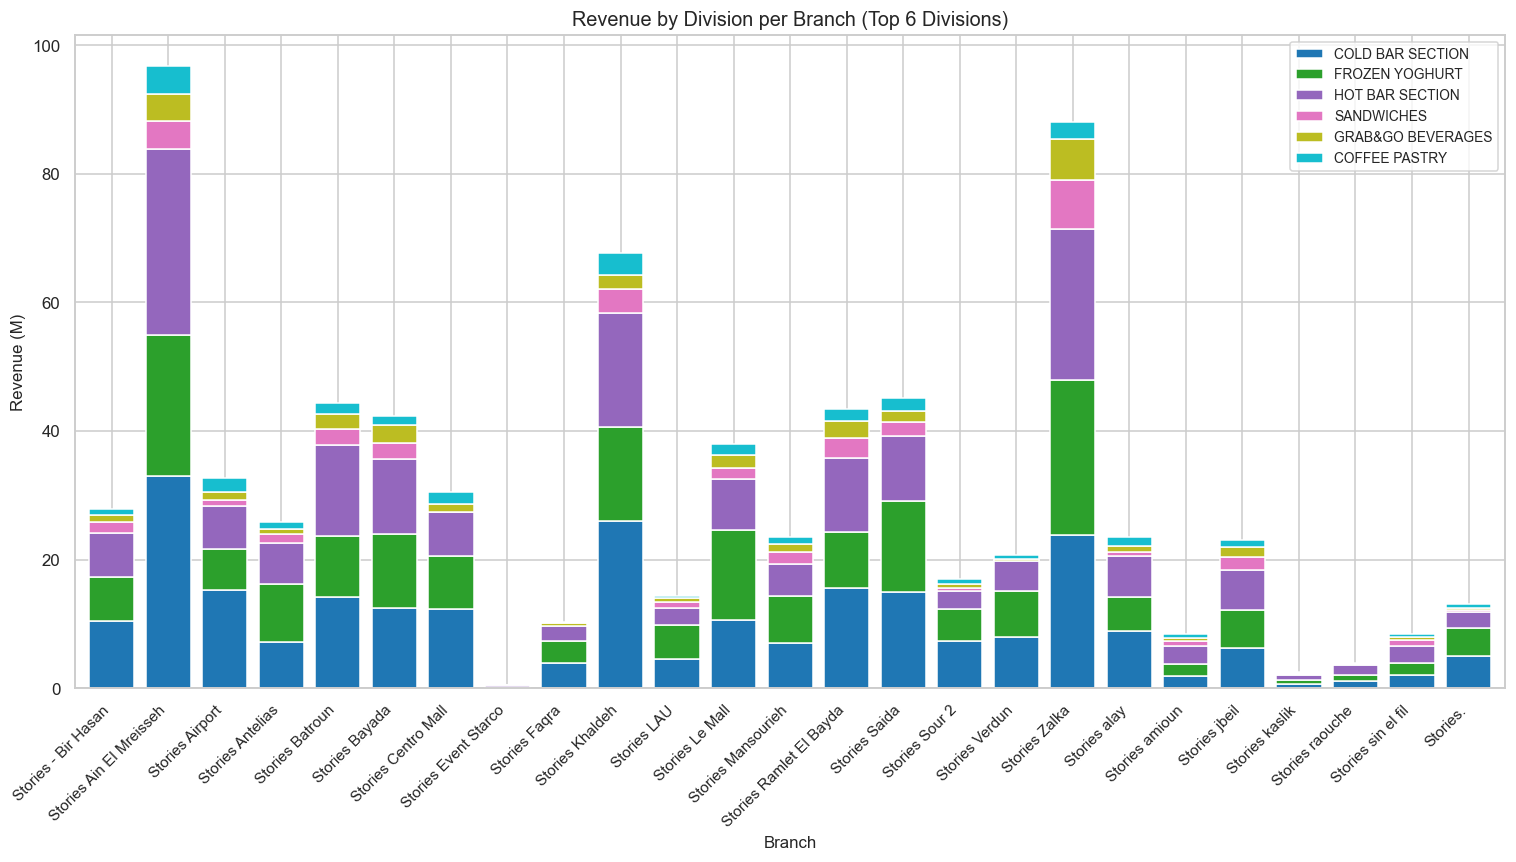

In [82]:
# Create pivot table
pivot_div = (
    df_sales_group
    .groupby(['Branch', 'Division'])['Total_Amount']
    .sum()
    .unstack(fill_value=0)
)
# Revenue by Division
div_revenue = (
    df_sales_group
    .groupby('Division')['Total_Amount']
    .sum()
    .sort_values(ascending=False)
)
# Keep top 6 divisions
top6_div = div_revenue.head(6).index

pivot_div[top6_div].div(1e6).plot(
    kind='bar',
    stacked=True,
    colormap='tab10',
    width=0.8,
    figsize=(14,8)   
)


plt.ylabel('Revenue (M)')
plt.title('Revenue by Division per Branch (Top 6 Divisions)')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

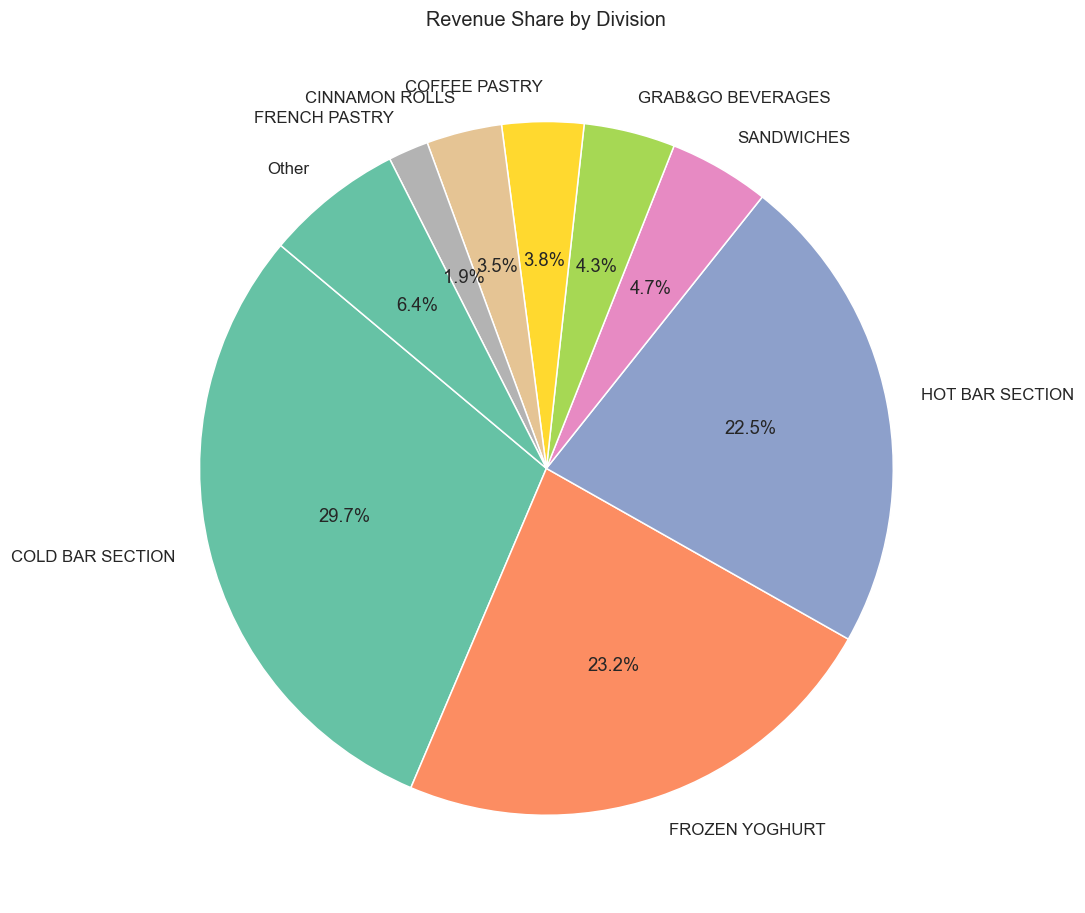

In [83]:
# Revenue by Division
div_revenue = (
    df_sales_group
    .groupby('Division')['Total_Amount']
    .sum()
    .sort_values(ascending=False)
)

# Top 8 + Other
top8 = div_revenue.head(8)
other = div_revenue.iloc[8:].sum()
pie_data = pd.concat([top8, pd.Series({'Other': other})])

plt.figure(figsize=(10,10))

plt.pie(
    pie_data.values,
    labels=pie_data.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2', len(pie_data))
)

plt.title('Revenue Share by Division')
plt.tight_layout()
plt.show()

### d. Category Profitability (df_category)

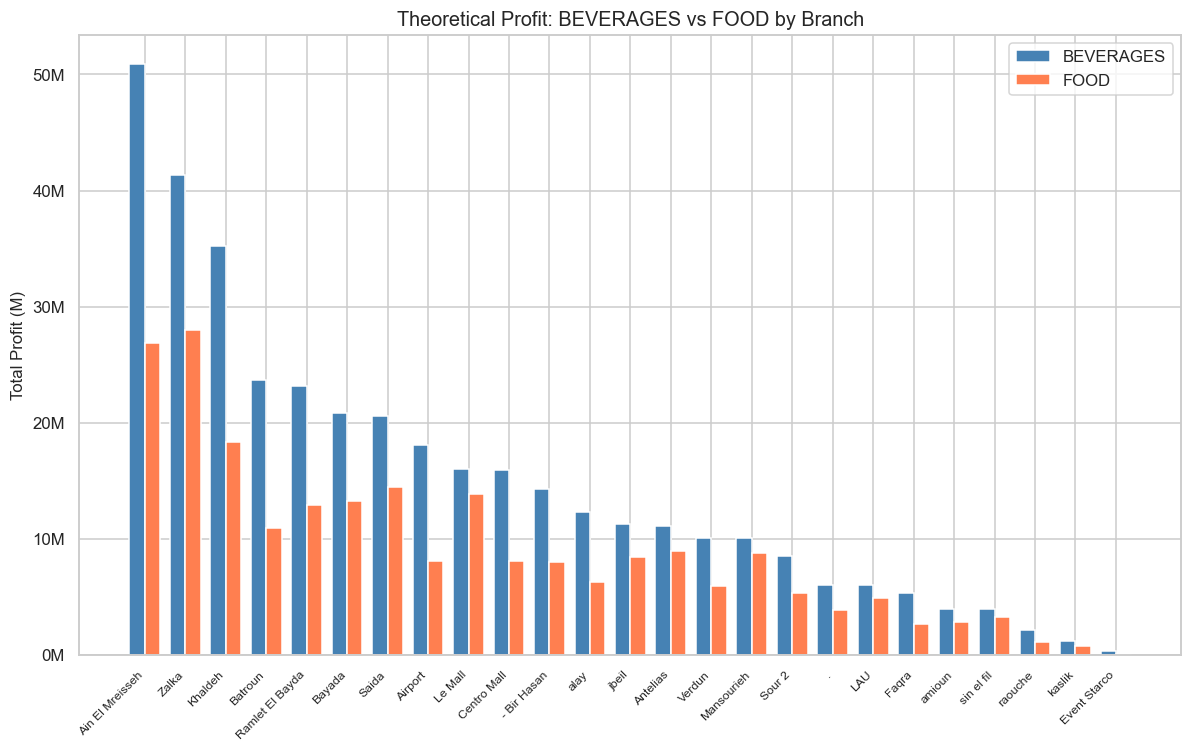

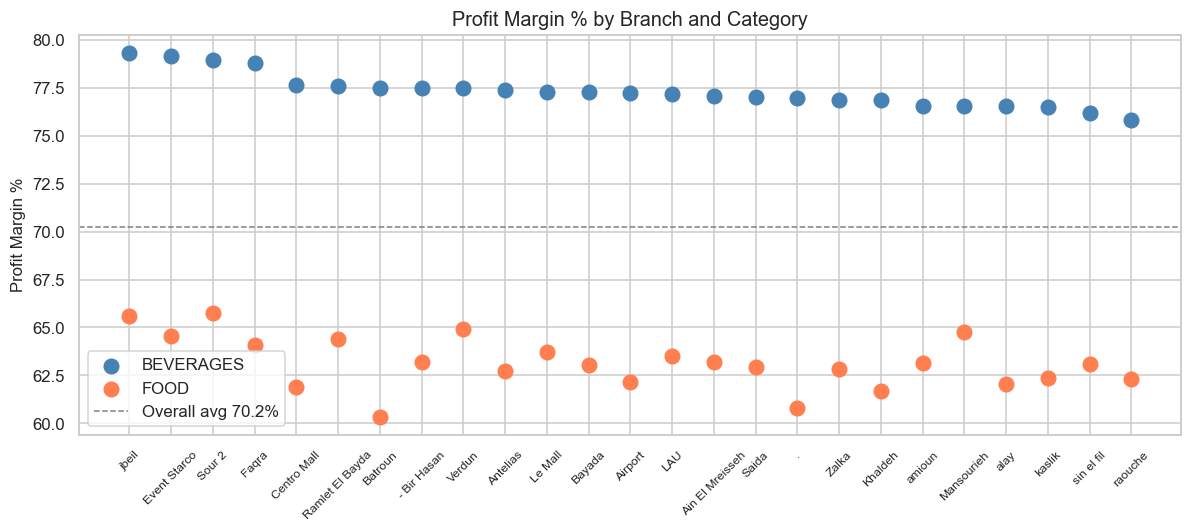

In [84]:
# BEVERAGES vs FOOD — Profit per Branch 
pivot_cat = (df_category.pivot_table(index='Branch', columns='Category',
                                      values='Total_Profit', aggfunc='sum')
             .sort_values('BEVERAGES', ascending=False))

fig, ax = plt.subplots(figsize=(11, 7))
x = np.arange(len(pivot_cat))
w = 0.38
ax.bar(x - w/2, pivot_cat['BEVERAGES']/1e6, w, label='BEVERAGES', color='steelblue')
ax.bar(x + w/2, pivot_cat['FOOD']/1e6,      w, label='FOOD',      color='coral')
ax.set_xticks(x)
ax.set_xticklabels([b.replace('Stories ', '').replace('Stories', '')
                    for b in pivot_cat.index], rotation=45, ha='right', fontsize=8)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f'{v:.0f}M'))
ax.set_ylabel('Total Profit (M)')
ax.set_title('Theoretical Profit: BEVERAGES vs FOOD by Branch')
ax.legend()
plt.tight_layout()
plt.show()

# Profit Margin % per Branch 
fig, ax = plt.subplots(figsize=(11, 5))
palette = {'BEVERAGES': 'steelblue', 'FOOD': 'coral'}
for cat, grp in df_category.groupby('Category'):
    grp_sorted = grp.sort_values('Total_Profit_Pct', ascending=False)
    short_names = grp_sorted['Branch'].str.replace('Stories ', '').str.replace('Stories', '')
    ax.scatter(short_names, grp_sorted['Total_Profit_Pct'],
               label=cat, color=palette[cat], s=90, zorder=3)
ax.axhline(df_category['Total_Profit_Pct'].mean(), color='grey', linestyle='--',
           linewidth=1, label=f"Overall avg {df_category['Total_Profit_Pct'].mean():.1f}%")
ax.tick_params(axis='x', labelrotation=45, labelsize=8)
ax.set_ylabel('Profit Margin %')
ax.set_title('Profit Margin % by Branch and Category')
ax.legend()
plt.tight_layout()
plt.show()


## 3. Machine Learning Implementation

The goal of this section is to use data-driven methods to recommend a **refined menu** for each Stories branch. We approach this through three lenses:

1. **Pareto (80/20) Analysis** — identify the small fraction of products driving most profit.
2. **K-Means Product Clustering** — group every product into actionable tiers: Stars, Workhorses, Marginal, and Loss-Makers.
3. **Menu Efficiency Score** — quantify how "lean" each branch's menu already is using the Gini coefficient.
4. **Branch-Level Recommendations** — produce a per-branch keep / monitor / remove table.

### a. Pareto Analysis (80/20 Rule)

For each branch, rank profitable products by descending profit and compute the cumulative share. The **percentage of the menu** needed to capture **80% of profit** measures how efficiently the menu is structured — a lower percentage means a leaner, more efficient menu.

In [85]:
pareto_records = []

for branch, grp in df_product.groupby('Branch'):
    pos = grp[grp['Total_Profit'] > 0].sort_values('Total_Profit', ascending=False).reset_index(drop=True)
    if pos.empty:
        continue
    total_pos_profit = pos['Total_Profit'].sum()
    pos['CumProfitPct'] = pos['Total_Profit'].cumsum() / total_pos_profit * 100

    # Index of first product that tips cumulative profit over 80 %
    idx_80 = int((pos['CumProfitPct'] >= 80).idxmax())
    n_80   = idx_80 + 1

    n_profitable = len(pos)
    n_loss       = int((grp['Total_Profit'] < 0).sum())
    n_zero       = int((grp['Total_Profit'] == 0).sum())
    n_total      = len(grp)

    pareto_records.append({
        'Branch':                    branch,
        'Total_Products':            n_total,
        'Profitable_Products':       n_profitable,
        'Loss_Making_Products':      n_loss,
        'Zero_Profit_Products':      n_zero,
        'Products_for_80pct_Profit': n_80,
        'Menu_Pct_for_80pct':        round(n_80 / n_total * 100, 1),
    })

df_pareto = pd.DataFrame(pareto_records).sort_values('Menu_Pct_for_80pct').reset_index(drop=True)

print("Pareto Summary — % of menu needed to capture 80 % of profit")
print(df_pareto.to_string(index=False))


Pareto Summary — % of menu needed to capture 80 % of profit
                 Branch  Total_Products  Profitable_Products  Loss_Making_Products  Zero_Profit_Products  Products_for_80pct_Profit  Menu_Pct_for_80pct
          Stories Saida             683                  601                    75                     7                         86                12.6
         Stories amioun             588                  479                   103                     6                         83                14.1
       Stories Antelias             549                  481                    59                     9                         80                14.6
Stories Ain El Mreisseh             916                  808                    70                    38                        140                15.3
         Stories Sour 2             749                  675                    68                     6                        115                15.4
        Stories Le Mall     

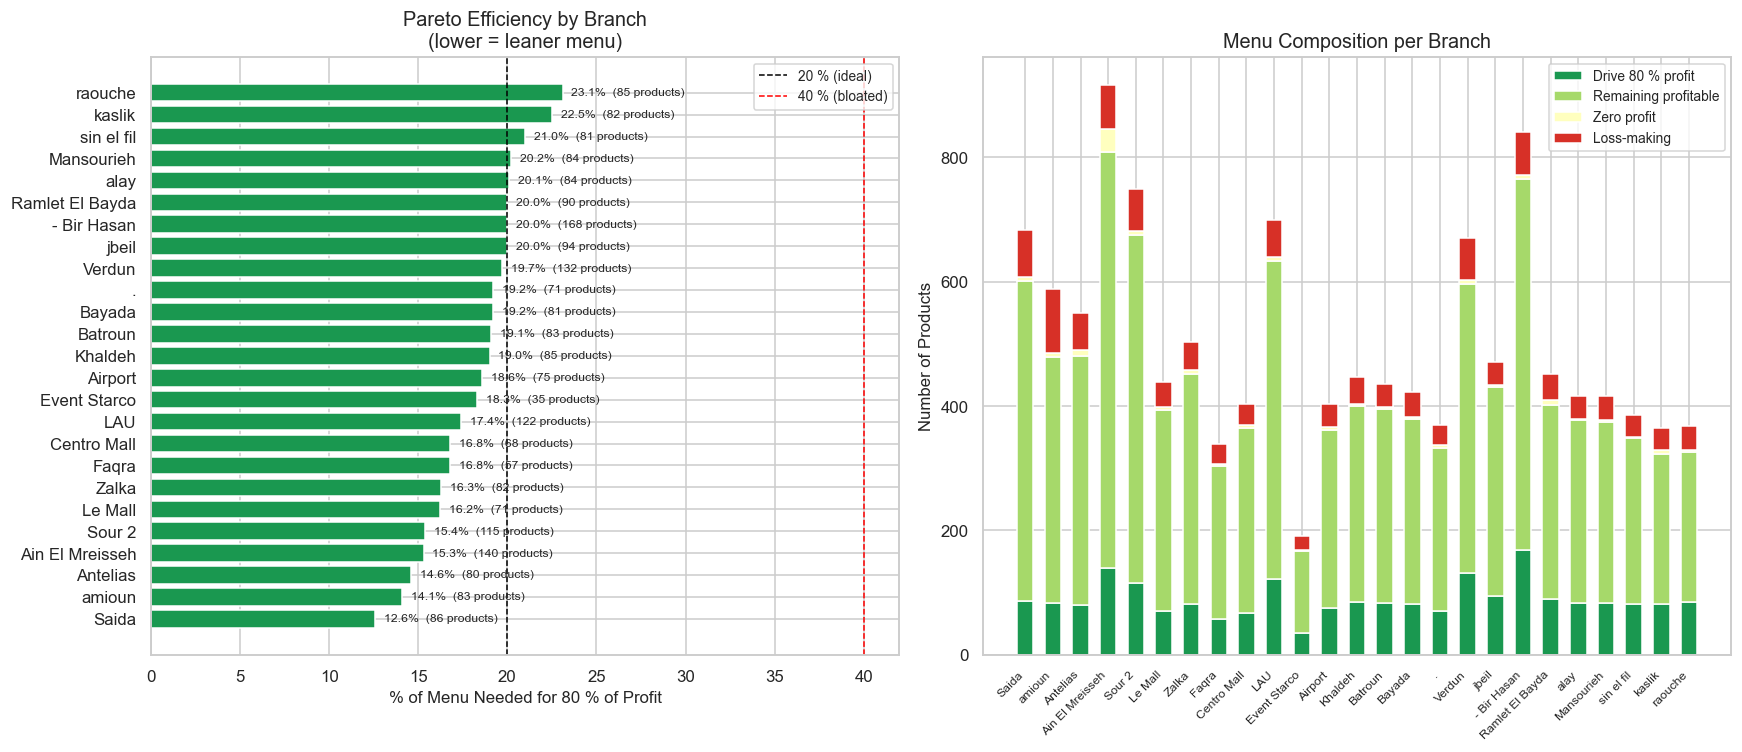

In [86]:
# Pareto bar chart ─ % of menu needed for 80 % profit, per branch 
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

short = [b.replace('Stories ', '').replace('Stories', '') for b in df_pareto['Branch']]
colors = ['#d73027' if v > 40 else '#fee08b' if v > 25 else '#1a9850'
          for v in df_pareto['Menu_Pct_for_80pct']]

axes[0].barh(short, df_pareto['Menu_Pct_for_80pct'], color=colors)
axes[0].axvline(20, color='black', linestyle='--', linewidth=1, label='20 % (ideal)')
axes[0].axvline(40, color='red',   linestyle='--', linewidth=1, label='40 % (bloated)')
axes[0].set_xlabel('% of Menu Needed for 80 % of Profit')
axes[0].set_title('Pareto Efficiency by Branch\n(lower = leaner menu)')
axes[0].legend(fontsize=9)
for i, (val, n) in enumerate(zip(df_pareto['Menu_Pct_for_80pct'], df_pareto['Products_for_80pct_Profit'])):
    axes[0].text(val + 0.5, i, f'{val}%  ({n} products)', va='center', fontsize=8)

# Stacked bar: product breakdown per branch
df_pareto_plot = df_pareto.set_index('Branch')
profitable_rest = df_pareto_plot['Profitable_Products'] - df_pareto_plot['Products_for_80pct_Profit']
ax2 = axes[1]
x = np.arange(len(df_pareto_plot))
w = 0.6
ax2.bar(x, df_pareto_plot['Products_for_80pct_Profit'], w, label='Drive 80 % profit', color='#1a9850')
ax2.bar(x, profitable_rest, w, bottom=df_pareto_plot['Products_for_80pct_Profit'],
        label='Remaining profitable', color='#a6d96a')
ax2.bar(x, df_pareto_plot['Zero_Profit_Products'],
        w, bottom=df_pareto_plot['Profitable_Products'], label='Zero profit', color='#ffffbf')
ax2.bar(x, df_pareto_plot['Loss_Making_Products'],
        w, bottom=df_pareto_plot['Profitable_Products'] + df_pareto_plot['Zero_Profit_Products'],
        label='Loss-making', color='#d73027')
ax2.set_xticks(x)
ax2.set_xticklabels([b.replace('Stories ', '').replace('Stories', '') for b in df_pareto_plot.index],
                    rotation=45, ha='right', fontsize=8)
ax2.set_ylabel('Number of Products')
ax2.set_title('Menu Composition per Branch')
ax2.legend(fontsize=9)

plt.tight_layout()
plt.show()


### b. K-Means Product Clustering — Menu Segmentation

We cluster every product (globally, across all branches) using four profit-related features: **Qty**, **Total Profit**, **Profit Margin %**, and **Cost Ratio %**. The elbow plot guides the choice of *k*, after which each cluster is labeled by inspecting centroid values.

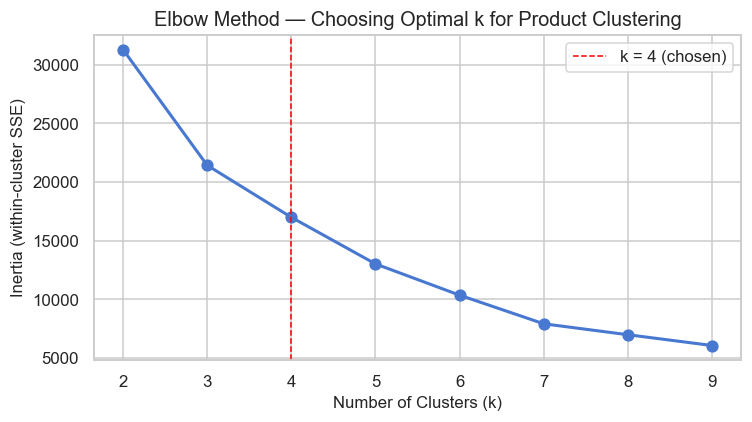

In [87]:
# Feature matrix 
CLUSTER_FEATURES = ['Qty', 'Total_Profit', 'Total_Profit_Pct', 'Total_Cost_Pct']

df_km = df_product[['Branch', 'Product'] + CLUSTER_FEATURES].copy()
df_km[CLUSTER_FEATURES] = df_km[CLUSTER_FEATURES].fillna(0)

km_scaler  = StandardScaler()
X_km       = km_scaler.fit_transform(df_km[CLUSTER_FEATURES])

# Elbow plot to choose k 
inertias = []
K_range  = range(2, 10)
for k in K_range:
    km_tmp = KMeans(n_clusters=k, random_state=42, n_init=10)
    km_tmp.fit(X_km)
    inertias.append(km_tmp.inertia_)

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(list(K_range), inertias, 'bo-', linewidth=2, markersize=7)
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Inertia (within-cluster SSE)')
ax.set_title('Elbow Method — Choosing Optimal k for Product Clustering')
ax.axvline(4, color='red', linestyle='--', linewidth=1, label='k = 4 (chosen)')
ax.legend()
plt.tight_layout()
plt.show()


In [88]:
# Fit K-Means with k=4 
K_OPT = 4
kmeans_final = KMeans(n_clusters=K_OPT, random_state=42, n_init=10)
df_km['Cluster'] = kmeans_final.fit_predict(X_km)

# Inspect centroids (original scale) to assign meaningful labels
centers = pd.DataFrame(
    km_scaler.inverse_transform(kmeans_final.cluster_centers_),
    columns=CLUSTER_FEATURES
)
centers['Cluster'] = range(K_OPT)
print("Cluster Centroids (original scale):")
print(centers.round(1).to_string(index=False))

# Auto-label clusters by Total_Profit centroid 
# Rank clusters: highest profit → Stars, then Workhorses, then Marginal, then Loss-Makers
sorted_idx = centers.sort_values('Total_Profit', ascending=False)['Cluster'].tolist()
label_list = ['Stars', 'Workhorses', 'Marginal', 'Loss-Makers']
cluster_label_map = {cid: label for cid, label in zip(sorted_idx, label_list)}

df_km['Tier'] = df_km['Cluster'].map(cluster_label_map)
print("\nCluster → Tier mapping:")
for cid, lbl in cluster_label_map.items():
    print(f"  Cluster {cid} → {lbl}")

Cluster Centroids (original scale):
    Qty  Total_Profit  Total_Profit_Pct  Total_Cost_Pct  Cluster
  364.4       29615.3              68.5            31.5        0
28859.9      242934.1              95.6             4.4        1
 4375.7      862657.0              79.7            20.3        2
 1151.0      -68697.5          -13848.1         13948.1        3

Cluster → Tier mapping:
  Cluster 2 → Stars
  Cluster 1 → Workhorses
  Cluster 0 → Marginal
  Cluster 3 → Loss-Makers


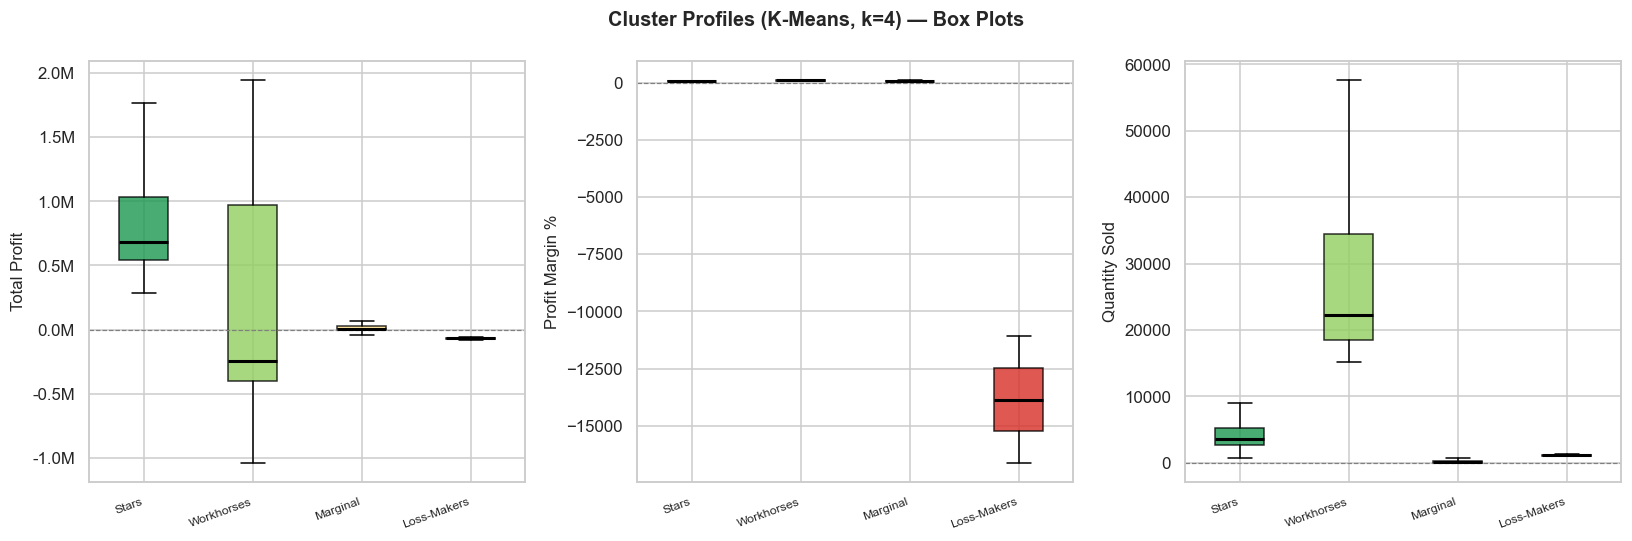


Cluster Summary:
             Count  Avg_Profit  Avg_Margin  Avg_Qty
Tier                                               
Stars          265    862657.0        79.7   4375.7
Workhorses      32    242934.1        95.6  28859.9
Marginal     12223     29615.3        68.5    364.4
Loss-Makers      2    -68697.5    -13848.1   1151.0


In [89]:
# Cluster profile box plots
tier_order  = ['Stars', 'Workhorses', 'Marginal', 'Loss-Makers']
tier_colors = {'Stars': '#1a9850', 'Workhorses': '#91cf60',
               'Marginal': '#fee08b',  'Loss-Makers': '#d73027'}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plot_features = ['Total_Profit', 'Total_Profit_Pct', 'Qty']
plot_labels   = ['Total Profit', 'Profit Margin %', 'Quantity Sold']

for ax, feat, lbl in zip(axes, plot_features, plot_labels):
    data_by_tier = [df_km[df_km['Tier'] == t][feat].dropna() for t in tier_order]
    bp = ax.boxplot(data_by_tier, patch_artist=True, showfliers=False,
                    medianprops={'color': 'black', 'linewidth': 2})
    for patch, tier in zip(bp['boxes'], tier_order):
        patch.set_facecolor(tier_colors[tier])
        patch.set_alpha(0.8)
    ax.set_xticklabels(tier_order, rotation=20, ha='right', fontsize=8)
    ax.set_ylabel(lbl)
    if feat == 'Total_Profit':
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f'{v/1e6:.1f}M'))
    ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)

fig.suptitle('Cluster Profiles (K-Means, k=4) — Box Plots', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary table 
summary_km = (df_km.groupby('Tier')
              .agg(Count=('Product', 'count'),
                   Avg_Profit=('Total_Profit', 'mean'),
                   Avg_Margin=('Total_Profit_Pct', 'mean'),
                   Avg_Qty=('Qty', 'mean'))
              .reindex(tier_order)
              .round(1))
print("\nCluster Summary:")
print(summary_km.to_string())

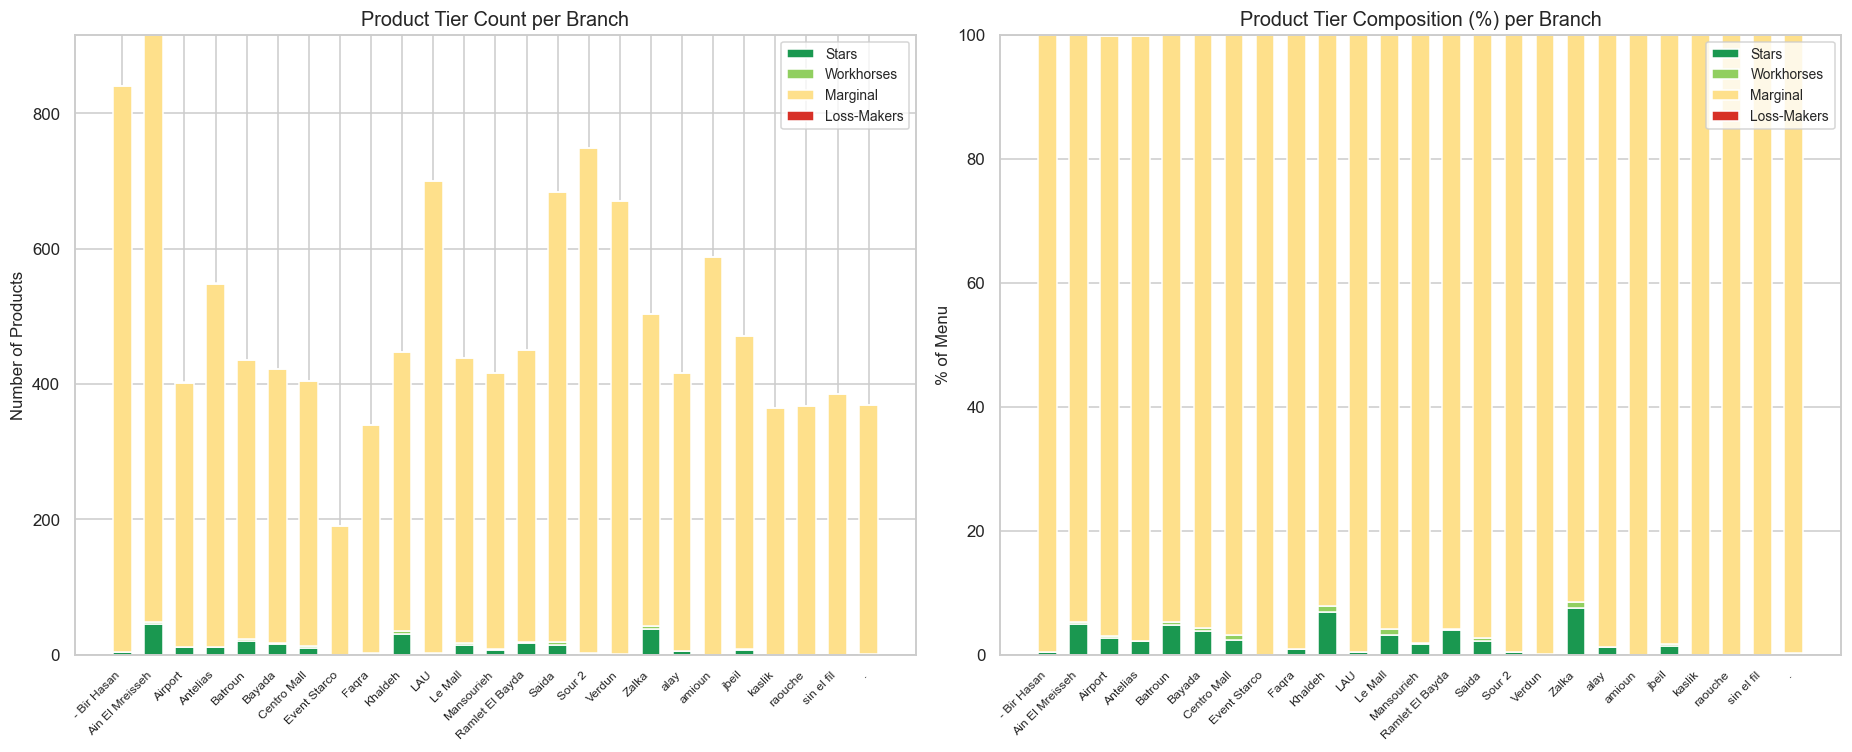

In [90]:
# Stacked bar: tier distribution per branch 
tier_dist = (df_km.groupby(['Branch', 'Tier'])['Product']
             .count().unstack(fill_value=0)
             .reindex(columns=tier_order, fill_value=0))

tier_dist_pct = tier_dist.div(tier_dist.sum(axis=1), axis=0) * 100
short_branches = [b.replace('Stories ', '').replace('Stories', '') for b in tier_dist_pct.index]

fig, axes = plt.subplots(1, 2, figsize=(17, 7))

# Absolute counts
bottom_abs = np.zeros(len(tier_dist))
for tier in tier_order:
    axes[0].bar(range(len(tier_dist)), tier_dist[tier], bottom=bottom_abs,
                label=tier, color=tier_colors[tier], width=0.6)
    bottom_abs += tier_dist[tier].values
axes[0].set_xticks(range(len(tier_dist)))
axes[0].set_xticklabels(short_branches, rotation=45, ha='right', fontsize=8)
axes[0].set_ylabel('Number of Products')
axes[0].set_title('Product Tier Count per Branch')
axes[0].legend(fontsize=9)

# Percentage
bottom_pct = np.zeros(len(tier_dist_pct))
for tier in tier_order:
    axes[1].bar(range(len(tier_dist_pct)), tier_dist_pct[tier], bottom=bottom_pct,
                label=tier, color=tier_colors[tier], width=0.6)
    bottom_pct += tier_dist_pct[tier].values
axes[1].set_xticks(range(len(tier_dist_pct)))
axes[1].set_xticklabels(short_branches, rotation=45, ha='right', fontsize=8)
axes[1].set_ylabel('% of Menu')
axes[1].set_title('Product Tier Composition (%) per Branch')
axes[1].legend(fontsize=9)

plt.tight_layout()
plt.show()

### c. Menu Efficiency Score (Gini Coefficient)

The **Gini coefficient** of a branch's profit distribution measures how concentrated the profit is across its products. A Gini of 1 means one product earns everything (ultra-lean); a Gini of 0 means every product contributes equally. High Gini + high fraction of loss-making products = prime candidate for menu pruning.

In [91]:
def gini(arr):
    """Gini coefficient — works on arrays that may contain negatives."""
    arr = np.array(arr, dtype=float)
    arr = arr - arr.min() + 1e-9          # shift to all-positive
    arr = np.sort(arr)
    n   = len(arr)
    idx = np.arange(1, n + 1)
    return (2 * (idx * arr).sum()) / (n * arr.sum()) - (n + 1) / n

# Compute efficiency score per branch 
efficiency_records = []

for branch, grp in df_product.groupby('Branch'):
    profit_vals = grp['Total_Profit'].fillna(0).values

    g        = round(gini(profit_vals), 3)
    loss_pct = round((profit_vals < 0).mean() * 100, 1)
    n_total  = len(profit_vals)

    # Combine Gini and loss fraction into one score (0–100, higher = needs more pruning)
    bloat_score = round((1 - g) * 50 + loss_pct * 0.5, 1)

    efficiency_records.append({
        'Branch':       branch,
        'N_Products':   n_total,
        'Gini':         g,
        'Loss_Pct':     loss_pct,
        'Bloat_Score':  bloat_score,
    })

df_efficiency = pd.DataFrame(efficiency_records).sort_values('Bloat_Score', ascending=False).reset_index(drop=True)
print("Menu Efficiency Scores (higher Bloat_Score = more pruning needed):")
print(df_efficiency.to_string(index=False))

Menu Efficiency Scores (higher Bloat_Score = more pruning needed):
                 Branch  N_Products  Gini  Loss_Pct  Bloat_Score
         Stories amioun         588 0.128      17.5         52.4
          Stories Saida         683 0.087      11.0         51.2
       Stories Antelias         549 0.090      10.7         50.8
         Stories Sour 2         749 0.084       9.1         50.4
        Stories Le Mall         438 0.091       9.1         50.0
            Stories LAU         700 0.096       8.6         49.5
               Stories.         369 0.101       8.7         49.3
    Stories Centro Mall         404 0.100       8.4         49.2
         Stories Verdun         671 0.117      10.1         49.2
          Stories Zalka         503 0.106       8.9         49.2
     Stories Mansourieh         416 0.116       9.4         48.9
Stories Ain El Mreisseh         916 0.106       7.6         48.5
           Stories alay         417 0.128       8.9         48.1
        Stories raouche

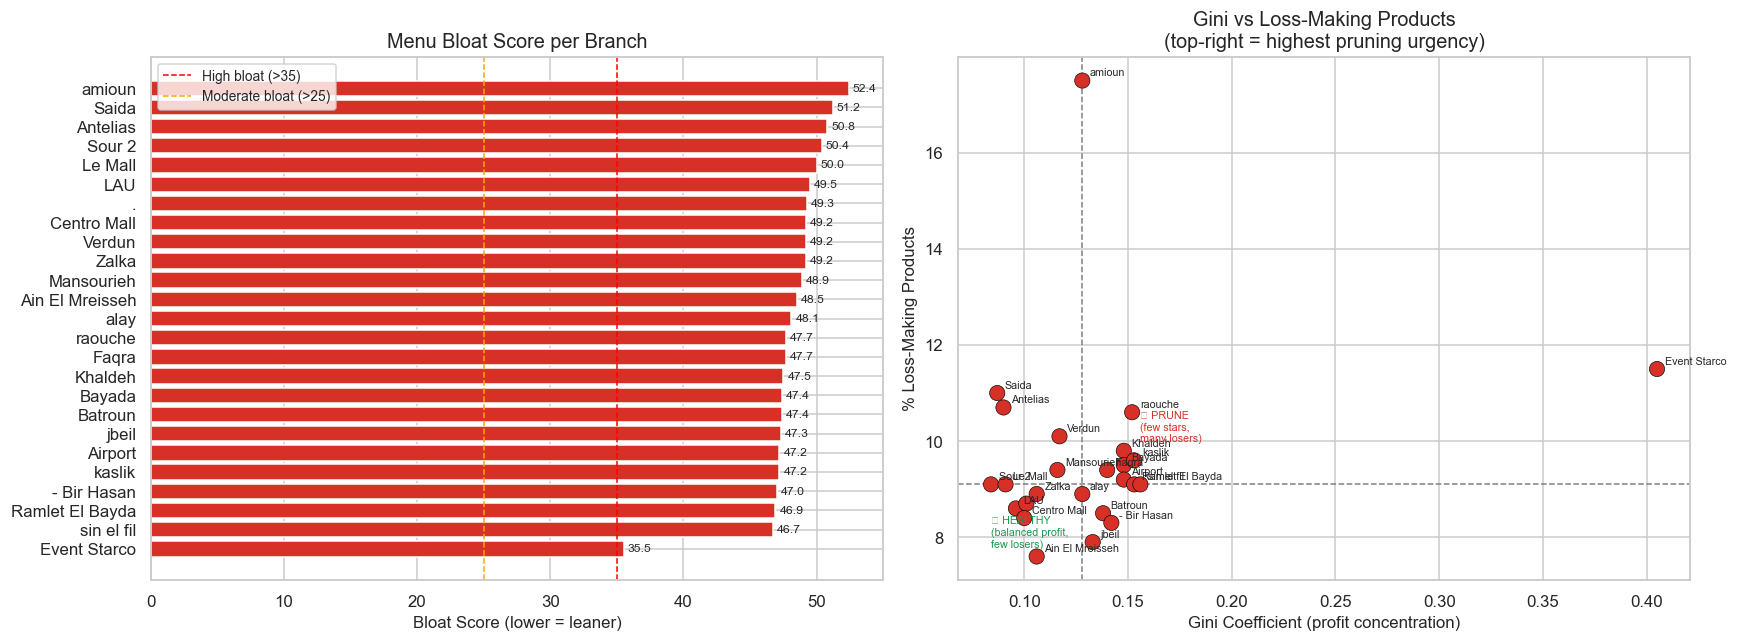

In [92]:
# Scatter: Gini vs Loss % — quadrant analysis 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

short_eff = [b.replace('Stories ', '').replace('Stories', '') for b in df_efficiency['Branch']]

# LEFT: Bloat Score bar chart
bar_colors = ['#d73027' if v > 35 else '#fee08b' if v > 25 else '#1a9850'
              for v in df_efficiency['Bloat_Score']]
axes[0].barh(short_eff[::-1], df_efficiency['Bloat_Score'][::-1], color=bar_colors[::-1])
axes[0].axvline(35, color='red',    linestyle='--', linewidth=1, label='High bloat (>35)')
axes[0].axvline(25, color='orange', linestyle='--', linewidth=1, label='Moderate bloat (>25)')
axes[0].set_xlabel('Bloat Score (lower = leaner)')
axes[0].set_title('Menu Bloat Score per Branch')
axes[0].legend(fontsize=9)
for i, val in enumerate(df_efficiency['Bloat_Score'][::-1]):
    axes[0].text(val + 0.3, i, f'{val}', va='center', fontsize=8)

# RIGHT: Gini vs Loss % scatter with quadrant lines
gini_med = df_efficiency['Gini'].median()
loss_med = df_efficiency['Loss_Pct'].median()

scatter_colors = ['#d73027' if b > 35 else '#fee08b' if b > 25 else '#1a9850'
                  for b in df_efficiency['Bloat_Score']]
axes[1].scatter(df_efficiency['Gini'], df_efficiency['Loss_Pct'],
                s=100, c=scatter_colors, zorder=3, edgecolors='black', linewidth=0.4)
for _, row in df_efficiency.iterrows():
    axes[1].annotate(
        row['Branch'].replace('Stories ', '').replace('Stories', ''),
        (row['Gini'], row['Loss_Pct']),
        textcoords='offset points', xytext=(5, 3), fontsize=7
    )
axes[1].axvline(gini_med, color='grey', linestyle='--', linewidth=1)
axes[1].axhline(loss_med, color='grey', linestyle='--', linewidth=1)
axes[1].set_xlabel('Gini Coefficient (profit concentration)')
axes[1].set_ylabel('% Loss-Making Products')
axes[1].set_title('Gini vs Loss-Making Products\n(top-right = highest pruning urgency)')

# Quadrant labels (positioned in data space using median as divider)
g_lo = df_efficiency['Gini'].min()
g_hi = df_efficiency['Gini'].max()
l_lo = df_efficiency['Loss_Pct'].min()
l_hi = df_efficiency['Loss_Pct'].max()
axes[1].text(gini_med + (g_hi - gini_med) * 0.1, loss_med + (l_hi - loss_med) * 0.1,
             '🔴 PRUNE\n(few stars,\nmany losers)',
             fontsize=7, color='#d73027', va='bottom')
axes[1].text(g_lo, l_lo + (loss_med - l_lo) * 0.1,
             '🟢 HEALTHY\n(balanced profit,\nfew losers)',
             fontsize=7, color='#1a9850', va='bottom')

plt.tight_layout()
plt.show()

### d. Branch-Level Menu Recommendations

We merge the K-Means tier with profit thresholds to assign each product at each branch one of three **action flags**:

| Flag | Criteria | Meaning |
|------|----------|---------|
| ✅ KEEP | Stars or Workhorses tier | Core menu — protect and promote |
| 👀 MONITOR | Marginal tier | Review pricing or placement |
| 🗑️ REMOVE | Loss-Makers tier *or* consistent negative profit | Eliminate to reduce cost drag |

In [93]:
# Build recommendation table 
def action_flag(tier, profit):
    if profit < 0:                             # any negative profit → remove regardless of tier
        return 'REMOVE'
    if tier in ('Stars', 'Workhorses'):
        return 'KEEP'
    elif tier == 'Marginal':
        return 'MONITOR'
    else:                                      # Loss-Makers cluster
        return 'REMOVE'

df_reco = df_km.copy()
df_reco['Action'] = df_reco.apply(lambda r: action_flag(r['Tier'], r['Total_Profit']), axis=1)

# Merge Total_Price only (Total_Profit_Pct is already in df_km from clustering)
extra = df_product[['Branch', 'Product', 'Total_Price']].drop_duplicates(subset=['Branch', 'Product'])
df_reco = df_reco.merge(extra, on=['Branch', 'Product'], how='left')

# Tidy display
df_reco_display = df_reco[['Branch', 'Product', 'Qty', 'Total_Price',
                             'Total_Profit', 'Total_Profit_Pct', 'Tier', 'Action']].copy()
df_reco_display.columns = ['Branch', 'Product', 'Qty', 'Revenue',
                            'Profit', 'Margin_%', 'Tier', 'Recommendation']

print(f"Recommendation breakdown:")
print(df_reco_display['Recommendation'].value_counts().to_string())
print(f"\nTotal products analysed: {len(df_reco_display)}")


Recommendation breakdown:
Recommendation
MONITOR    11046
REMOVE      1199
KEEP         277

Total products analysed: 12522


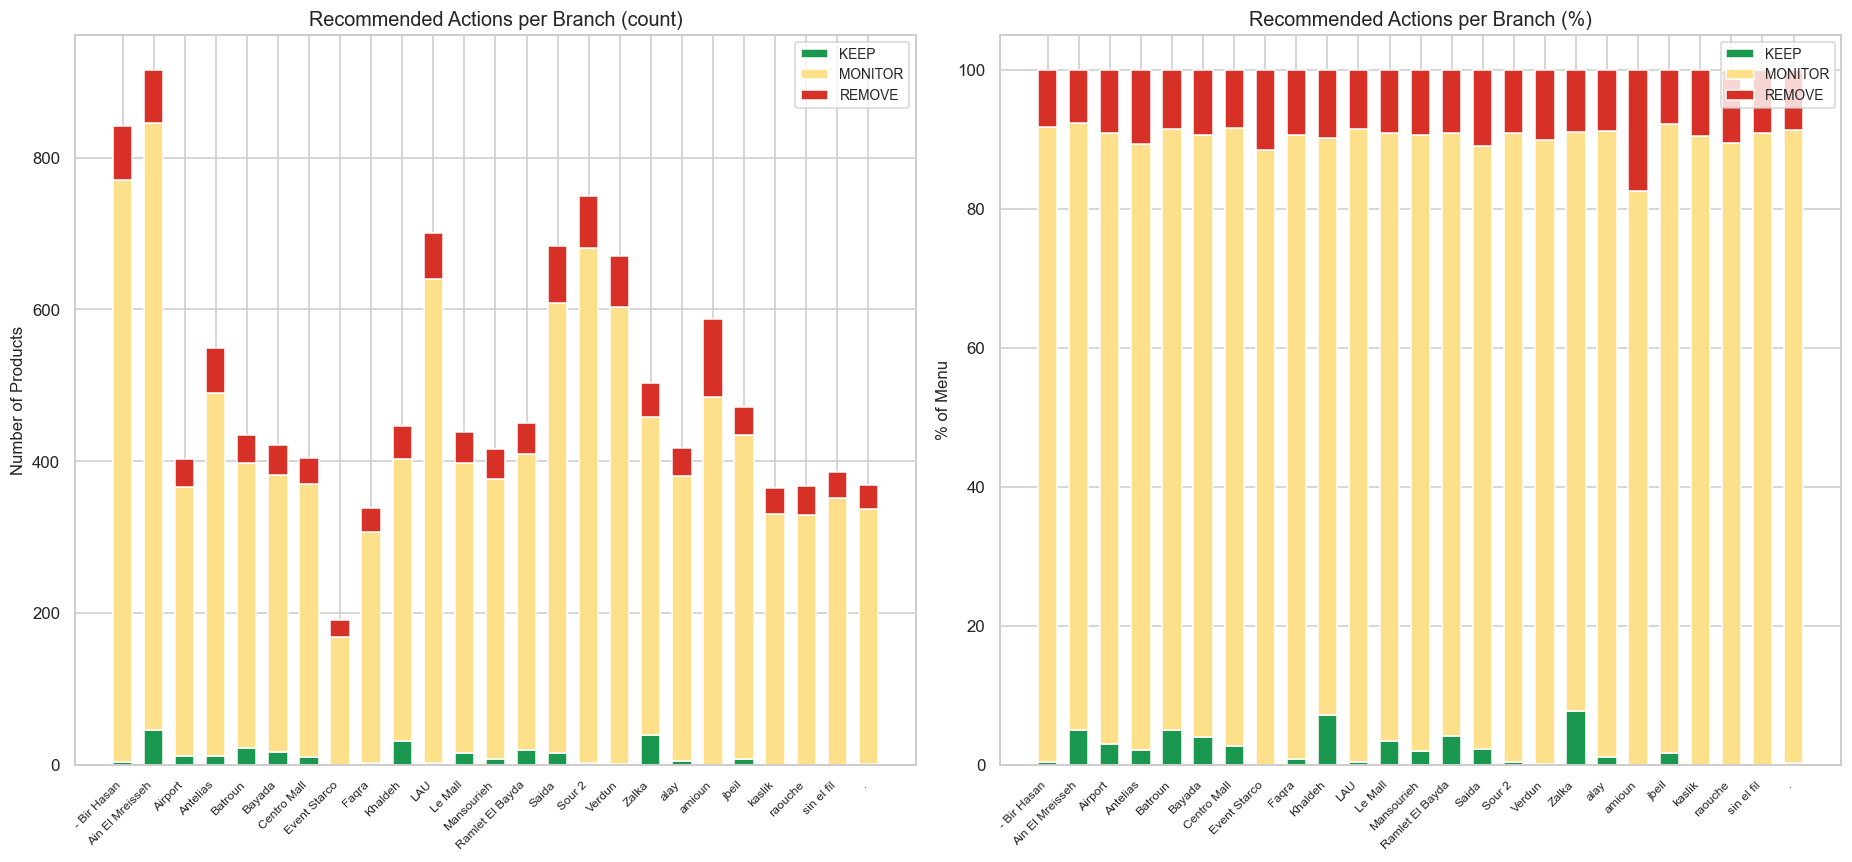

In [94]:
# Action count per branch
action_pivot = (df_reco_display.groupby(['Branch', 'Recommendation'])
                .size().unstack(fill_value=0))

# Ensure all columns present
for col in ['KEEP', 'MONITOR', 'REMOVE']:
    if col not in action_pivot.columns:
        action_pivot[col] = 0

action_pivot = action_pivot[['KEEP', 'MONITOR', 'REMOVE']]
action_pct   = action_pivot.div(action_pivot.sum(axis=1), axis=0) * 100

short_br = [b.replace('Stories ', '').replace('Stories', '') for b in action_pivot.index]
x_pos = np.arange(len(action_pivot))
w = 0.62

fig, axes = plt.subplots(1, 2, figsize=(17, 8))
action_colors = {'KEEP': '#1a9850', 'MONITOR': '#fee08b', 'REMOVE': '#d73027'}

for ax, data, title, ylabel in zip(
    axes,
    [action_pivot, action_pct],
    ['Recommended Actions per Branch (count)', 'Recommended Actions per Branch (%)'],
    ['Number of Products', '% of Menu']
):
    bottom = np.zeros(len(data))
    for action in ['KEEP', 'MONITOR', 'REMOVE']:
        ax.bar(x_pos, data[action], w, bottom=bottom,
               label=action, color=action_colors[action])
        bottom += data[action].values
    ax.set_xticks(x_pos)
    ax.set_xticklabels(short_br, rotation=45, ha='right', fontsize=8)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

In [95]:
# Top REMOVE candidates per branch (biggest loss-makers) 
print("=" * 70)
print("TOP PRODUCTS TO REMOVE PER BRANCH (highest profit loss)")
print("=" * 70)

remove_df = df_reco_display[df_reco_display['Recommendation'] == 'REMOVE'].copy()

for branch, grp in remove_df.groupby('Branch'):
    top_remove = grp.sort_values('Profit').head(5)
    short_name = branch.replace('Stories ', '').replace('Stories', '')
    print(f"\n📍 {short_name}  (total to remove: {len(grp)})")
    for _, row in top_remove.iterrows():
        p_fmt = f"{row['Profit']/1e6:+.2f}M" if not np.isnan(row['Profit']) else 'N/A'
        m_fmt = f"{row['Margin_%']:.1f}%" if not np.isnan(row['Margin_%']) else 'N/A'
        print(f"   • {row['Product'][:45]:<45}  Profit: {p_fmt:>9}   Margin: {m_fmt}")

# Branch-level summary 
print("\n\n" + "=" * 70)
print("BRANCH MENU OPTIMISATION SUMMARY")
print("=" * 70)

summary_reco = action_pivot.copy()
summary_reco['Total'] = summary_reco.sum(axis=1)
summary_reco['Remove_%'] = (summary_reco['REMOVE'] / summary_reco['Total'] * 100).round(1)
summary_reco = summary_reco.merge(
    df_efficiency.set_index('Branch')[['Gini', 'Bloat_Score']],
    left_index=True, right_index=True
).sort_values('Bloat_Score', ascending=False)

for branch, row in summary_reco.iterrows():
    urgency = 'HIGH' if row['Bloat_Score'] > 35 else 'MODERATE' if row['Bloat_Score'] > 25 else 'LOW'
    short   = branch.replace('Stories ', '').replace('Stories', '')
    print(f"\n{short}")
    print(f"   Keep: {int(row['KEEP']):3d}  |  Monitor: {int(row['MONITOR']):3d}  "
          f"|  Remove: {int(row['REMOVE']):3d}  ({row['Remove_%']}%)")
    print(f"   Bloat Score: {row['Bloat_Score']:.1f}   Gini: {row['Gini']:.3f}   Pruning Urgency: {urgency}")


TOP PRODUCTS TO REMOVE PER BRANCH (highest profit loss)

📍 - Bir Hasan  (total to remove: 70)
   • BLUEBERRIES COMBO                              Profit:    -0.13M   Margin: 100.0%
   • STRAWBERRY COMBO                               Profit:    -0.11M   Margin: 100.0%
   • MANGO COMBO                                    Profit:    -0.07M   Margin: 100.0%
   • VEGGIE SUB                                     Profit:    -0.06M   Margin: -641.5%
   • PINEAPPLE COMBO                                Profit:    -0.06M   Margin: 100.0%

📍 Ain El Mreisseh  (total to remove: 70)
   • BLUEBERRIES COMBO                              Profit:    -0.63M   Margin: 100.0%
   • STRAWBERRY COMBO                               Profit:    -0.40M   Margin: 100.0%
   • MANGO COMBO                                    Profit:    -0.24M   Margin: 100.0%
   • BLUEBERRIES COMBO                              Profit:    -0.24M   Margin: 100.0%
   • PINEAPPLE COMBO                                Profit:    -0.22M   Margin: 

### Section 3a — Pareto Analysis (80/20 Rule)

Computes, per branch, the % of the menu needed to generate 80% of profit
Key finding: Saida is the leanest (12.6% of menu → 80% profit); raouche is the most bloated (23.1%). No branch exceeds the 40% "danger zone", but all have room to trim.

### Section 3b — K-Means Clustering (k=4)

Clusters every product across all branches using: Qty, Total Profit, Profit Margin %, Cost Ratio %
The elbow plot confirms k=4; clusters auto-labeled by centroid profit:
Stars (265): avg profit 862K — protect and promote
Workhorses (32): high volume (28K units), avg 243K profit
Marginal (12K+): low profit, need pricing/placement review
Loss-Makers (2): extreme outliers
Stacked bar shows every branch is ~85-90% Marginal products — massive pruning opportunity

### Section 3c — Menu Efficiency Score (Gini)

Gini coefficient of profit distribution per branch; combined with loss-product % into a Bloat Score
Event Starco is the healthiest (Gini 0.405, Bloat Score 35.5); amioun needs the most attention (Bloat Score 52.4)
Section 3d — Branch-Level Recommendations

Each product gets: KEEP (Stars/Workhorses, positive profit), MONITOR (Marginal), or REMOVE (any negative profit)
Results: 277 KEEP · 11,046 MONITOR · 1,199 REMOVE across all branches
Prints the top 5 worst loss-makers per branch with profit and margin figures
